# Final Project: Used Car Purchases
Module 3 | Chapter 4 | Notebook 1

Over the previous chapters and modules, you learned a great deal of data science methods. After you performed a regression on data with relatively few features in the test project, you can now focus on classification in the final project. You'll receive a data set containing used car purchases and unbalanced target categories.

***
By the end of this exercise you will have done the following:
* Imported and cleaned the data
* Carried out feature engineering
* Fitted the model to the data
* Combined the individual steps into to a data pipeline
* interpreted your model.
***


In this exercise you will only receive a few hints and should work as independently as possible.

At the end of this project, you will generate classifications for data points that only StackFuel knows the target values for. The data is located in the file *features_aim.csv*. So you will have to repeat most of the steps. The easiest way to do this is to package all relevant work steps (such as data cleaning, feature engineering and making predictions) into functions. At the end, you'll call these functions in the correct order and apply them to the target dataset *features_aim.csv*.


**Scenario**: You work as a data scientist for a US used car dealer. The dealer buys used cars at low prices in online auctions and from other car dealers in order to resell them profitably on their own platform. It's not always easy to tell whether it is worth buying a used car: One of the biggest challenges in used car auctions is the risk of a car having problems that are so serious, that they prevent it from being resold to customers. These are referred to as "lemons" - cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car and at the same time cannot be repaired with a reasonable number of repairs or within a certain period of time. In cases like this, the customer has the right to be refunded the purchase price. In addition to the purchase costs, the bad purchase of these so-called lemons leads to considerable costs as a result, such as the storage and repair of the car, which can result in market losses when the vehicle is resold.

That is why it is important for your boss to rule out as many bad purchases as possible. To help the buyers in the company with the large number of cars on offer, you are to develop a model that predicts whether a car would be a bad buy, a so-called lemon. However, this must not lead to too many good purchases being excluded. You won't receive more detailed information on the costs and profits of the respective purchases for developing the prototype just yet.


Each row of the dataset corresponds to a car that was first auctioned and then resold. The data dictionary looks like this:

Column number | Column name | Type | Description
:---|:---|:---|:----  
1 | `'IsBadBuy'` | categorical (nominal) | Identifies whether the auctioned car is a "lemon", and therefore whether it was a bad buy (`0`= not a lemon, `1`= lemon)
2  |  `'PurchDate'` | continuous (`datetime`) | The date the vehicle was purchased at the auction
3 | `'Auction'` | categorical (nominal) | auction provider the vehicle was purchased from
4  |  `'VehYear'` | continuous (`int`) | Vehicle's year model 
5  |  `'VehicleAge'` | continuous (`int`) | The age of the car at the time of the auction
6  |  `'Make'` | categorical (nominal) | Car manufacturer
7  |  `'Model'` | categorical (nominal) | Car model
8  |  `'Trim'` | categorical (nominal) | Vehicle trim
9  |  `'SubModel'` | categorical (nominal) | Car submodel
10  |  `'Color'` | categorical (nominal) | Vehicle color
11  |  `'Tranmission'` | categorical (nominal) | Vehicle transmission type (automatic, manual)
12  |  `'WheelTypeID'` | categorical (nominal) | The type ID of the wheel rims 
13  |  `'WheelType'` | categorical (nominal) | The type of wheel rims
14  |  `'VehOdo'` | continuous (`int`) | Vehicle mileage
15  |  `'Nationality'` | categorical (nominal) | Manufacturer's country
16  |  `'Size'` | categorical (nominal) | The size class of the vehicle (compact, SUV, etc.)
17 | `'TopThreeAmericanName'` | categorical (nominal) | indicates whether the manufacturer is one of the three leading American car manufacturers.
18  |  `'MMRAcquisitionAuctionAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in average condition at the time of purchase
19  |  `'MMRAcquisitionAuctionCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in above average condition at the time of purchase
20  |  `'MMRAcquisitionRetailAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in average condition at the time of purchase
21  |  `'MMRAcquisitonRetailCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in above-average condition at the time of purchase
22  |  `'MMRCurrentAuctionAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in average condition
23  |  `'MMRCurrentAuctionCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in above-average condition
24  |  `'MMRCurrentRetailAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in average condition
25  |  `'MMRCurrentRetailCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in above-average condition
26  |  `'PRIMEUNIT'` | categorical (nominal) | Indicates whether the vehicle would have a higher demand than a standard purchase 
27  |  `'AUCGUART'` | categorical (nominal) | The guarantee level given for the vehicle by the auction platform (`'GREEN'` - guarantee  present, `'YELLOW'` - guarantee unclear, `'RED'` - no guarantee)
28 | `'BYRNO'` | categorical (nominal) | Unique number assigned to the buyer who bought the vehicle
29  |  `'VNZIP1'` | categorical (nominal) | Zip code where the vehicle was purchased
30  |  `'VNST'` | categorical (nominal) |  State of the vehicle when it was purchased 
31 | `'VehBCost'` | continuous (`int`) | Purchase costs in US dollars paid for the vehicle at the time of purchase
32  |  `'IsOnlineSale'` | categorical (nominal) |  Indicates whether the vehicle was originally purchased online.
33 | `'WarrantyCost'` | continuous (`int`) | Cost of the warranty for a term of 36 months

**Tip**: This data dictionary is also located in the file *Data_dictionary.ipynb*. You can open this in a separate window with your file browser.


The following headings and texts should give you a rough guideline. You can always add more code cells or change your approach if you want to.

You'll follow the steps of the *Stackfuel Way* here again. You can find the PDF in *The Data Science Workflow* (Module 3 Chapter 3)


## Preparation


A data science model always has the purpose of solving a certain problem. So it's best to briefly review the task and consider the context of your model.
* What problem should the model solve?
* What is the nature of the problem (e.g. classification, regression, clustering...)
* What would an application using your model look like?
Which requirements has your employer specified for your model?
* What data do you need so that you can build your model?


### Define metric


Based on your understanding of the problem at hand, you should now consider which metric(s) are best suited to assess the success of your model.


### Gather data


The data is stored in the file *data_train.csv*. The target vector is given by the column `'IsBadBuy'`. 
Import the modules you typically need for importing and exploring the data. Then import the data.


In [1]:
# import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import RANSACRegressor
from sklearn.cluster import DBSCAN

from statsmodels.robust import mad

from sklearn.linear_model import LinearRegression

import pdpipe as pdp

In [2]:
# read data 
readableCols = ['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
               'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
               'WheelType', 'VehMileage', 'Nationality', 'Size', 'AmericanTop',
               'AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',
               'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice',
               'CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',
               'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice',
               'PRIMEUNIT', 'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch', 'StateAtPurch', 'VehBCost',
               'IsOnlineSale', 'WarrantyCost']

categorical_columns = ['IsBadBuy', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 
                       'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'AmericanTop', 'PRIMEUNIT', 
                       'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch', 'StateAtPurch', 'IsOnlineSale']

continuous_columns = ['IsBadBuy','VehYear', 'VehicleAge', 'VehMileage', 
                       'AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',
                       'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice',
                       'CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',
                       'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice',
                      'VehBCost', 'WarrantyCost']


correlated_cols_Acq = ['AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',
                       'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice']

correlated_cols_Current = ['CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',
                           'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice']


#df = pd.read_csv("data_train.csv", skipinitialspace=True, usecols=readableCols)
#df = pd.read_csv("data_train.csv", dtype={'PurchDate': np.datetime64} )
#date_parser=['PurchDate']
#parse_dates=['PurchDate']

df = pd.read_csv("data_train.csv")
df.columns = readableCols
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

df.head()

IsBadBuy  PurchDate  Auction  VehYear  VehicleAge       Make  \
0         0 2009-11-11    OTHER     2007           2        KIA   
1         0 2009-01-07    ADESA     2005           4     SUZUKI   
2         1 2010-11-02    OTHER     2006           4  CHEVROLET   
3         0 2009-03-04  MANHEIM     2004           5  CHEVROLET   
4         0 2009-07-23  MANHEIM     2007           2   CHRYSLER   

                  Model Trim        SubModel   Color  ...  \
0               SPECTRA  NaN     4D SEDAN EX   BLACK  ...   
1   FORENZA 2.0L I4 EFI   EX        4D WAGON  SILVER  ...   
2                COBALT   LT     2D COUPE LT     RED  ...   
3   VENTURE FWD V6 3.4L   LS  PASSENGER 3.4L  SILVER  ...   
4  TOWN & COUNTRY 2WD V  Bas    MINIVAN 3.3L     RED  ...   

  CurrentRetailAvgPrice  CurrentRetailCleanPrice PRIMEUNIT  GuartAtAuction  \
0                9568.0                  10428.0       NaN             NaN   
1                5227.0                   5978.0       NaN             NaN   
2                8235.0                   9230.0       NaN             NaN   
3                4325.0                   5325.0       NaN             NaN   
4                   0.0                      0.0       NaN             NaN   

  BuyerIdAtPurch ZIPAtPurch StateAtPurch  VehBCost  IsOnlineSale  WarrantyCost  
0           5546      35004           AL    6400.0             0           462  
1          20207      77086           TX    3870.0             0           569  
2           1235      84104           UT    5310.0             1           803  
3          20928      32824           FL    4600.0             0          4622  
4            835      85353           AZ    6215.0             0          1623  

[5 rows x 33 columns]

## EDA


### Understand the data


Familiarize yourself with the data at the beginning so that you know what to look out for later when you clean and prepare the data.

**Tip**: The `'PurchDate'` column is indicated as a Unix timestamp in whole seconds. To convert this column with into a date format `pandas`, you can use the following code: `my_df.loc[:, 'PurchDate'] = pd.to_datetime(my_df.loc[:, 'PurchDate'], unit='s')`.


In [3]:
df.info()

#Columns with types problems
#Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   IsBadBuy                      65620 non-null  int64         
 1   PurchDate                     65620 non-null  datetime64[ns]
 2   Auction                       65620 non-null  object        
 3   VehYear                       65620 non-null  int64         
 4   VehicleAge                    65620 non-null  int64         
 5   Make                          65620 non-null  object        
 6   Model                         65620 non-null  object        
 7   Trim                          63522 non-null  object        
 8   SubModel                      65613 non-null  object        
 9   Color                         65613 non-null  object        
 10  Transmission                  65612 non-null  object        
 11  WheelTypeID                 

In [4]:
df.describe()

IsBadBuy       VehYear    VehicleAge   WheelTypeID     VehMileage  \
count  65620.000000  65620.000000  65620.000000  62747.000000   65620.000000   
mean       0.123499   2005.345215      4.175130      1.494589   71505.930280   
std        0.329012      1.730096      1.709897      0.520986   14582.977355   
min        0.000000   2001.000000      0.000000      0.000000    5368.000000   
25%        0.000000   2004.000000      3.000000      1.000000   61844.750000   
50%        0.000000   2005.000000      4.000000      1.000000   73378.500000   
75%        0.000000   2007.000000      5.000000      2.000000   82440.000000   
max        1.000000   2010.000000      9.000000      3.000000  115717.000000   

       AcquisitionAuctionAvgPrice  AcquisitionAuctionCleanPrice  \
count                65602.000000                  65602.000000   
mean                  6127.143807                   7371.157236   
std                   2456.965693                   2716.442814   
min                      0.000000                      0.000000   
25%                   4273.000000                   5405.000000   
50%                   6094.000000                   7303.000000   
75%                   7765.000000                   9018.750000   
max                  35722.000000                  36859.000000   

       AcquisitionRetailAvgPrice  AcquisitonRetailCleanPrice  \
count               65602.000000                65602.000000   
mean                 8498.240770                 9851.611003   
std                  3153.983067                 3382.364048   
min                     0.000000                    0.000000   
25%                  6279.000000                 7494.000000   
50%                  8447.000000                 9792.000000   
75%                 10658.000000                12094.000000   
max                 39080.000000                41482.000000   

       CurrentAuctionAvgPrice  CurrentAuctionCleanPrice  \
count            65330.000000              65330.000000   
mean              6131.694092               7389.951768   
std               2430.506847               2681.441548   
min                  0.000000                  0.000000   
25%               4275.000000               5412.000000   
50%               6062.000000               7314.000000   
75%               7735.000000               9012.000000   
max              35722.000000              36859.000000   

       CurrentRetailAvgPrice  CurrentRetailCleanPrice  BuyerIdAtPurch  \
count           65330.000000             65330.000000    65620.000000   
mean             8776.866019             10145.912582    26363.516931   
std              3087.008256              3305.658577    25733.105869   
min                 0.000000                 0.000000      835.000000   
25%              6540.000000              7790.250000    17212.000000   
50%              8736.000000             10103.000000    19662.000000   
75%             10910.000000             12309.000000    22808.000000   
max             39080.000000             41062.000000    99761.000000   

        ZIPAtPurch      VehBCost  IsOnlineSale  WarrantyCost  
count  65620.00000  65564.000000  65620.000000  65620.000000  
mean   58090.45413   6727.464264      0.025236   1277.375815  
std    26147.50006   1759.011960      0.156843    599.971059  
min     3106.00000      1.000000      0.000000    462.000000  
25%    32124.00000   5435.000000      0.000000    837.000000  
50%    73129.00000   6700.000000      0.000000   1169.000000  
75%    80022.00000   7900.000000      0.000000   1623.000000  
max    99224.00000  38785.000000      1.000000   7498.000000

In [5]:
#check NaNs and duplicates
print('index_size', df.index.size)
#print('\nis NaN\n', df.isna().sum())
print('\nis NaN in % \n', df.isna().sum() * 100 /df.index.size)
print('\nduplicated', df.duplicated().sum())

#with empty values, importants columns
#Trim
#SubModel
#Color
#Transmission
#WheelTypeID
#WheelType

#Nationality
#Size
#AmericanTop

#PRIMEUNIT
#GuartAtAuction

#VehBCost
print(type(correlated_cols_Acq))
df = df.dropna(subset=[ 'Trim','SubModel','Color','Transmission','WheelTypeID',
                       'WheelType','Nationality','Size','VehBCost'])

impute_knn= KNNImputer(n_neighbors=5)
col_num = correlated_cols_Acq + correlated_cols_Current
imputed_data= impute_knn.fit_transform(df[col_num])
imputed_df= pd.DataFrame(imputed_data, columns=col_num, index=df.index)
df= pd.concat([df.drop(columns=col_num), imputed_df], axis=1)
df.isna().sum()

#Will be replace with theirs defaults values
#AmericanTop
#PRIMEUNIT
#GuartAtAuction

print('\nis NaN correlated_cols_Acq\n', df.loc[:,correlated_cols_Acq].isna().sum())
print('\nis NaN correlated_cols_Current\n', df.loc[:,correlated_cols_Current].isna().sum())

#df = df.dropna(subset=[])

index_size 65620

is NaN in % 
 IsBadBuy                         0.000000
PurchDate                        0.000000
Auction                          0.000000
VehYear                          0.000000
VehicleAge                       0.000000
Make                             0.000000
Model                            0.000000
Trim                             3.197196
SubModel                         0.010667
Color                            0.010667
Transmission                     0.012191
WheelTypeID                      4.378238
WheelType                        4.384334
VehMileage                       0.000000
Nationality                      0.006096
Size                             0.006096
AmericanTop                      0.006096
AcquisitionAuctionAvgPrice       0.027431
AcquisitionAuctionCleanPrice     0.027431
AcquisitionRetailAvgPrice        0.027431
AcquisitonRetailCleanPrice       0.027431
CurrentAuctionAvgPrice           0.441938
CurrentAuctionCleanPrice         0.441938
Cu

In [6]:
#with empty values
#Trim
#SubModel
#Color
#Transmission
#WheelTypeID
#WheelType

#Nationality
#Size
#AmericanTop

#PRIMEUNIT
#GuartAtAuction

#VehBCost

#check objects
print('df length: ', len(df))
#print('SubModel unique: ', df.SubModel.unique())
print('Color: ', df.Color.unique())
print('Transmission: ', df.Transmission.unique())
print('Make unique: ', df.Make.unique())
#print('Model unique: ', df.Model.unique())
print('Trim unique: ', df.Trim.unique())

print('\n\nWheelTypeID unique counts: ', df.WheelTypeID.value_counts())

print('\n\nWheelTypeID unique counts: ', df.WheelTypeID.value_counts())

print('\n\nWheelTypeID unique counts: ', df.WheelTypeID.value_counts())
print('WheelType unique counts: ', df.WheelType.value_counts())

#print('\nVehicleAge unique: ', df.VehicleAgeAtPurch.unique())
#print('VehicleAge unique counts: ', df.VehicleAgeAtPurch.value_counts())

print('\nVehMileage unique counts: ', df.VehMileage.unique())

print('\n\nNationality unique: ', df.Nationality.unique())
print('Nationality unique counts: ', df.Nationality.value_counts())

print('\n\nAmericanTop unique: ', df.AmericanTop.unique())
print('AmericanTop unique counts: ', df.AmericanTop.value_counts())

print('\n\nPRIMEUNIT unique: ', df.PRIMEUNIT.unique())
print('PRIMEUNIT unique counts: ', df.PRIMEUNIT.value_counts())

print('\n\nGuartAtAuction unique counts: ', df.GuartAtAuction.unique())
print('GuartAtAuction unique counts: ', df.GuartAtAuction.value_counts())

print('\n\nnumerical_columns unique: ', df[continuous_columns].nunique())
print('\n\ncategorical_columns unique: ', df[categorical_columns].nunique())

df length:  60713
Color:  ['SILVER' 'RED' 'BLACK' 'WHITE' 'GOLD' 'GREY' 'BLUE' 'GREEN' 'PURPLE'
 'MAROON' 'YELLOW' 'ORANGE' 'BEIGE' 'OTHER' 'BROWN' 'NOT AVAIL']
Transmission:  ['AUTO' 'MANUAL' 'Manual']
Make unique:  ['SUZUKI' 'CHEVROLET' 'CHRYSLER' 'NISSAN' 'MITSUBISHI' 'DODGE' 'PONTIAC'
 'FORD' 'KIA' 'HONDA' 'MERCURY' 'GMC' 'SATURN' 'MAZDA' 'JEEP' 'HYUNDAI'
 'BUICK' 'SCION' 'OLDSMOBILE' 'TOYOTA' 'ISUZU' 'MINI' 'LINCOLN' 'VOLVO'
 'VOLKSWAGEN' 'SUBARU' 'ACURA' 'INFINITI']
Trim unique:  ['EX' 'LT' 'LS' 'Bas' 'SE' 'DE' 'LX' 'SXT' 'SLT' 'SX' 'Tou' 'ZX4' 'SEL'
 'GT' 'Cla' 'SL' 'SLE' 'Spo' '2' 'W/T' 'ZX5' 'DS' 'XE' 'i' 'XLT' '3' 'GLS'
 'Cus' 'Lim' 'CX' 'ZX2' 'GL' 'Nor' 'Lar' 'SES' 'S' 'ES' '1' 'STX' 'ST'
 'Edg' 'SL2' 'Adv' 'SC1' 'Lux' 'L20' 'ZX3' 'LE' '150' 's' 'XLS' 'Edd' 'XL'
 'CXL' 'GS' 'L30' 'GTC' 'Sta' 'LXi' 'SVT' 'Sig' 'T5' 'CE' 'SV6' 'LW2'
 'Pre' 'VP' 'Ren' 'GXE' 'OZ' 'SS' 'C' 'SL1' 'R/T' 'GTP' 'Her' 'Hig' 'ZTS'
 'FX4' 'Ent' 'Z71' 'LL' 'Hyb' 'RS' 'SR5' 'LTZ' 'Den' 'ZXW' 'Pro' 'Plu'
 

In [7]:
df = df.applymap(lambda s: s.upper() if type(s) == str else s)

df.loc[:, 'PRIMEUNIT'].fillna('Unkown', inplace=True)
df.loc[:, 'GuartAtAuction'].fillna('YELLOW', inplace=True)

dict_GuartAtAuction = {'GREEN': 2, 'YELLOW': 1,  'RED': 0}
df.loc[:, 'GuartAtAuction'] = df.loc[:, 'GuartAtAuction'].replace(dict_GuartAtAuction)

dict_PRIMEUNIT = {'YES': 1, 'NO': 0}
df.loc[:, 'PRIMEUNIT'] = df.loc[:, 'PRIMEUNIT'].replace(dict_PRIMEUNIT)

#Nationality unique:  ['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']
#AmericanTop unique:  ['OTHER' 'GM' 'CHRYSLER' 'FORD']

#UNCOMMENT LATTER
#for col in df[categorical_columns]:
#    df.loc[:,col] = df.loc[:,col].astype('category')

df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

df[categorical_columns].head()

IsBadBuy  Auction       Make                 Model Trim          SubModel  \
1         0    ADESA     SUZUKI   FORENZA 2.0L I4 EFI   EX          4D WAGON   
2         1    OTHER  CHEVROLET                COBALT   LT       2D COUPE LT   
3         0  MANHEIM  CHEVROLET   VENTURE FWD V6 3.4L   LS    PASSENGER 3.4L   
4         0  MANHEIM   CHRYSLER  TOWN & COUNTRY 2WD V  BAS      MINIVAN 3.3L   
5         0    OTHER     NISSAN  XTERRA 2WD V6 3.3L V   SE  4D SPORT UTILITY   

    Color Transmission  WheelTypeID WheelType     Nationality        Size  \
1  SILVER         AUTO          2.0    COVERS     OTHER ASIAN      MEDIUM   
2     RED         AUTO          1.0     ALLOY        AMERICAN     COMPACT   
3  SILVER         AUTO          2.0    COVERS        AMERICAN         VAN   
4     RED         AUTO          1.0     ALLOY        AMERICAN         VAN   
5  SILVER         AUTO          1.0     ALLOY  TOP LINE ASIAN  MEDIUM SUV   

  AmericanTop PRIMEUNIT  GuartAtAuction  BuyerIdAtPurch  ZIPAtPurch  \
1       OTHER    Unkown               1           20207       77086   
2          GM    Unkown               1            1235       84104   
3          GM    Unkown               1           20928       32824   
4    CHRYSLER    Unkown               1             835       85353   
5       OTHER    Unkown               1           21053       95673   

  StateAtPurch  IsOnlineSale  
1           TX             0  
2           UT             1  
3           FL             0  
4           AZ             0  
5           CA             0

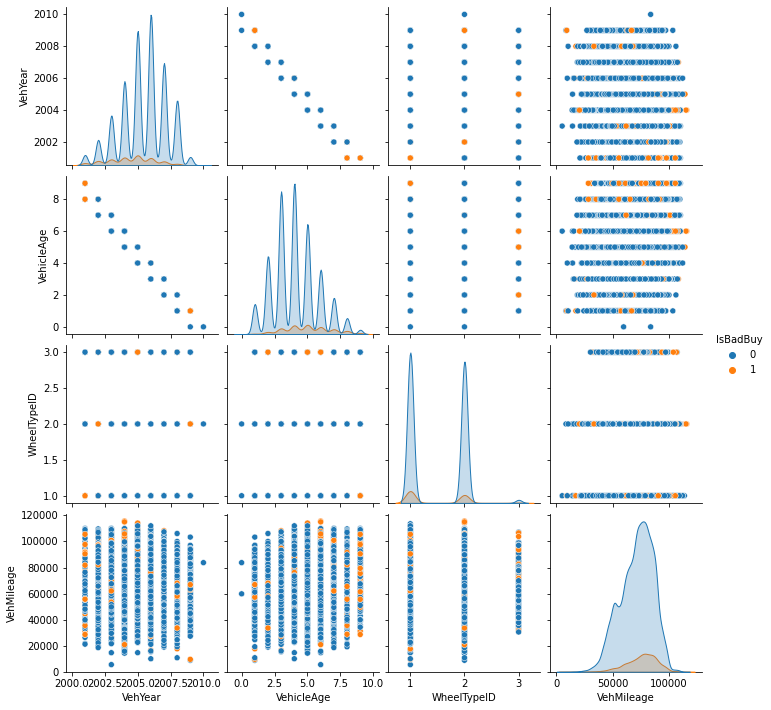

In [8]:
# check distribution of values in each feature
df.columns

carRelated_cols = ['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
                   'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
                   'WheelType', 'VehMileage', 'Nationality', 'Size', 'AmericanTop']
carValue_cols =   ['IsBadBuy','AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',
                   'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice',
                   'CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',
                   'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice']
buyRelated_cols=  ['IsBadBuy','PRIMEUNIT', 'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch', 'StateAtPurch', 
                   'VehBCost', 'IsOnlineSale', 'WarrantyCost']

display(sns.pairplot(df.loc[:,carRelated_cols], hue='IsBadBuy'))

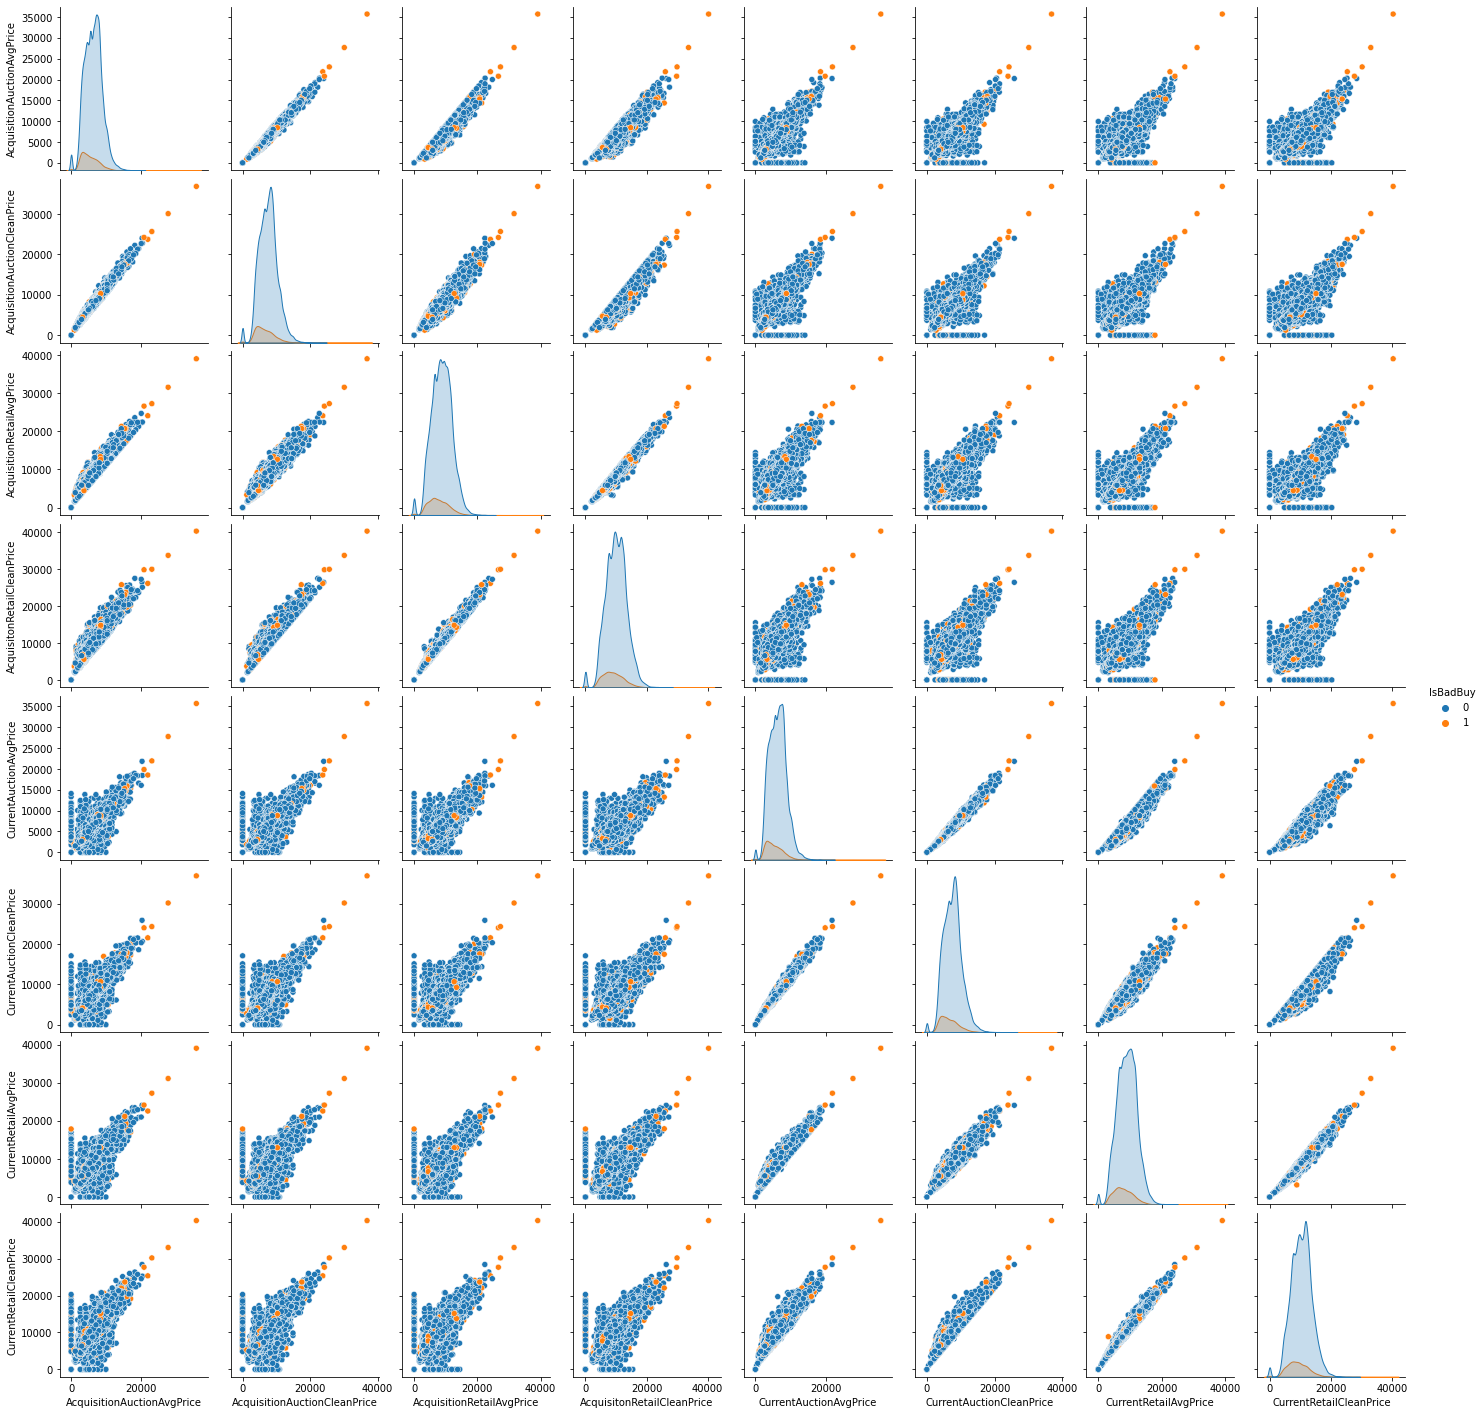

In [9]:
display(sns.pairplot(df.loc[:,carValue_cols], hue='IsBadBuy'))

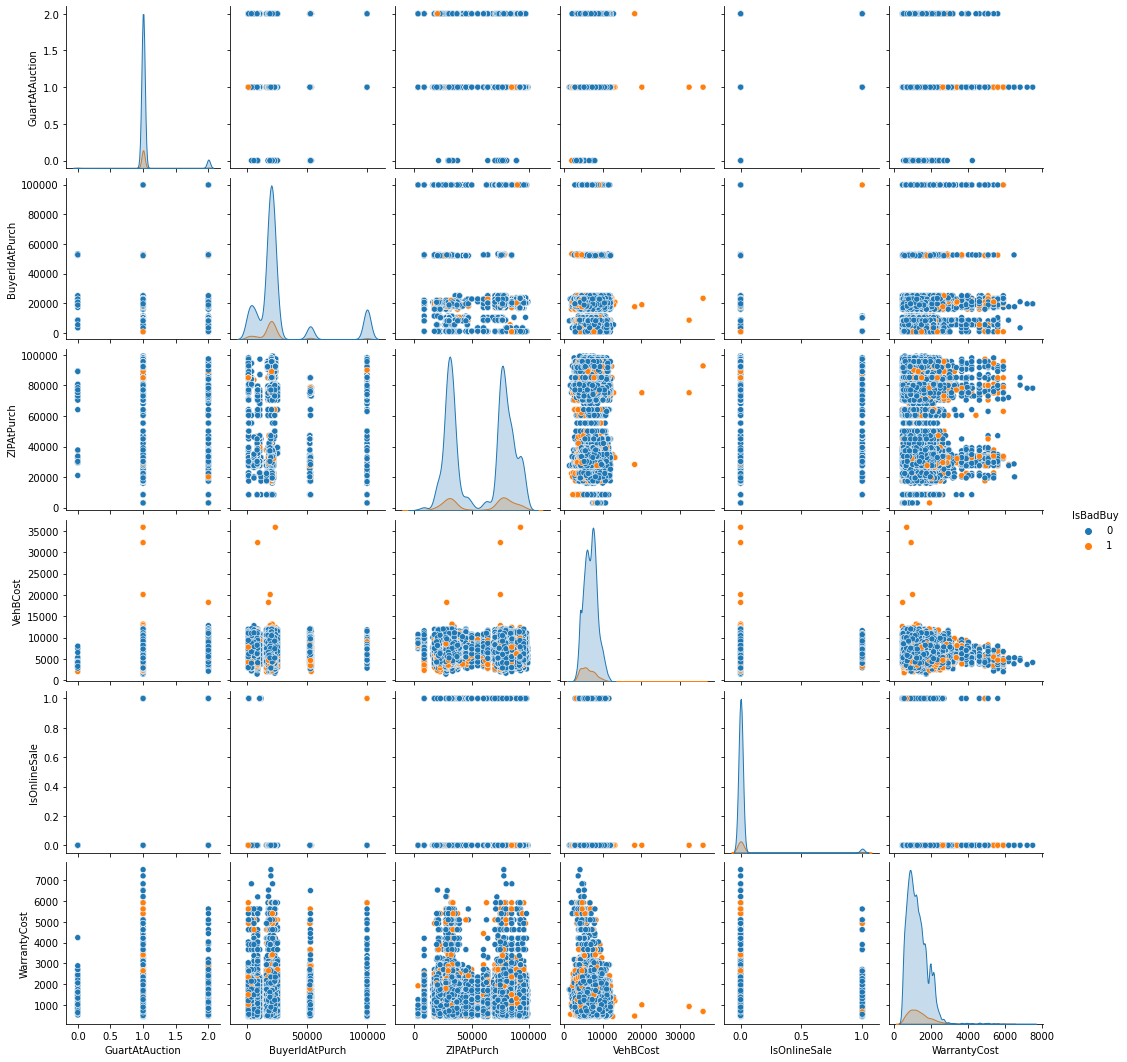

In [10]:
display(sns.pairplot(df.loc[:,buyRelated_cols], hue='IsBadBuy'));

<AxesSubplot:>

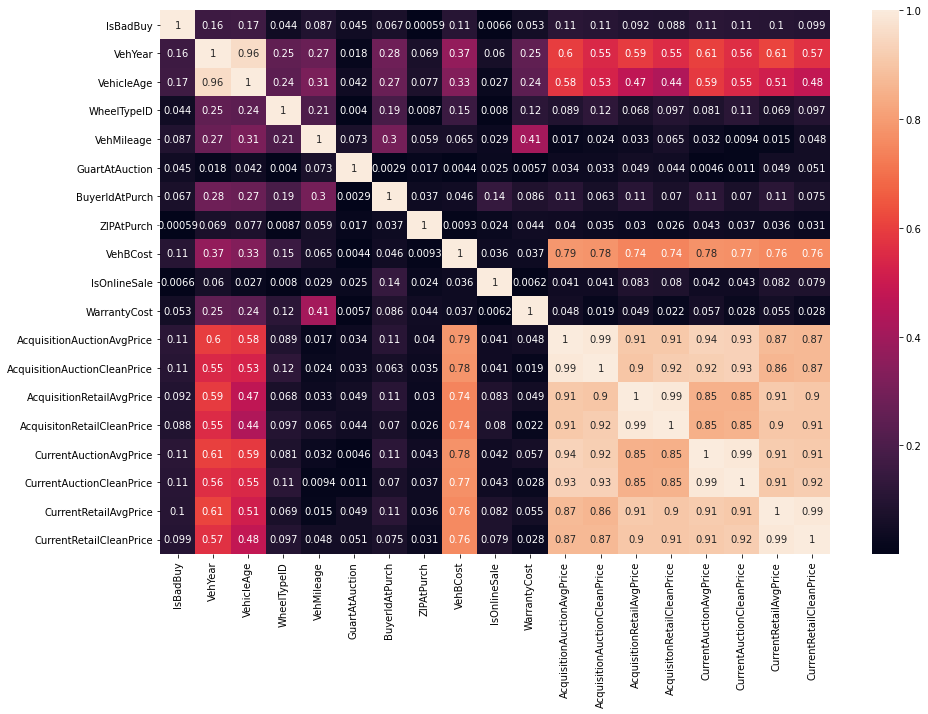

In [11]:
plt.figure(figsize=(15,10)) 
display(sns.heatmap(df.corr().abs(), annot=True));

In [12]:
#startOver()
#newDf = pcaMe(df, ['VehYear', 'VehicleAge'], 'VehicleAge')
#display(newDf.columns)

#plt.figure(figsize=(15,10))
#display(sns.heatmap(newDf.loc[:,['VehicleAge','VehMileage']].corr().abs(), annot=True));

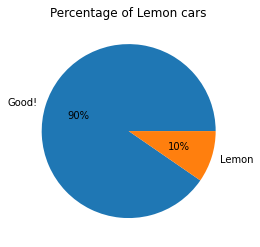

In [13]:
# import median absolute deviation (mad) from statsmodels and visualize data
df.loc[:,'IsBadBuy'].value_counts()

plt.title('Percentage of Lemon cars')
plt.pie(df.loc[:,'IsBadBuy'].value_counts(), labels=['Good!','Lemon'], autopct='%.0f%%') 
plt.show()

In [14]:
#display(df[categorical_columns].head())
#display(df.loc[:,'Nationality'].value_counts().values)

#for i, col in enumerate(['Nationality', 'AmericanTop', 'PRIMEUNIT','GuartAtAuction', 'IsOnlineSale']):
#    plt.figure(i)
#    sns.catplot(x=col, y="IsBadBuy", dta=df[categorical_columns], kind="point", aspect=2)
#    plt.xticks(rotation=90)

display(df[categorical_columns].pivot_table('IsBadBuy', index='Nationality', columns='PRIMEUNIT', aggfunc='count'))
print('\n')
display(df[categorical_columns].pivot_table('IsBadBuy', index='Nationality', columns='GuartAtAuction', aggfunc='count'))
print('\n')

#groupNationality = df.groupby('Nationality')
#df_extraColumns = groupNationality.agg({ 'IsBadBuy': 'count', 'PRIMEUNIT': 'count', 'GuartAtAuction': 'count'})
#df_extraColumns.head()

groupIsBadBuy = df.groupby('IsBadBuy')
df_extraColumns = groupIsBadBuy.agg({ 'PRIMEUNIT': 'count', 'GuartAtAuction': 'count'})
df_extraColumns.head()

groupIsBadBuy = df.groupby('GuartAtAuction')
df_extraColumns = groupIsBadBuy.agg({ 'IsBadBuy': 'count' })
df_extraColumns.head()

PRIMEUNIT          0   1  Unkown
Nationality                     
AMERICAN        2427  44   49170
OTHER             19   1     140
OTHER ASIAN      340   1    5413
TOP LINE ASIAN   134   5    3019

GuartAtAuction     0        1       2
Nationality                          
AMERICAN        61.0  49170.0  2410.0
OTHER            1.0    140.0    19.0
OTHER ASIAN      8.0   5413.0   333.0
TOP LINE ASIAN   NaN   3019.0   139.0

IsBadBuy
GuartAtAuction          
0                     70
1                  57742
2                   2901

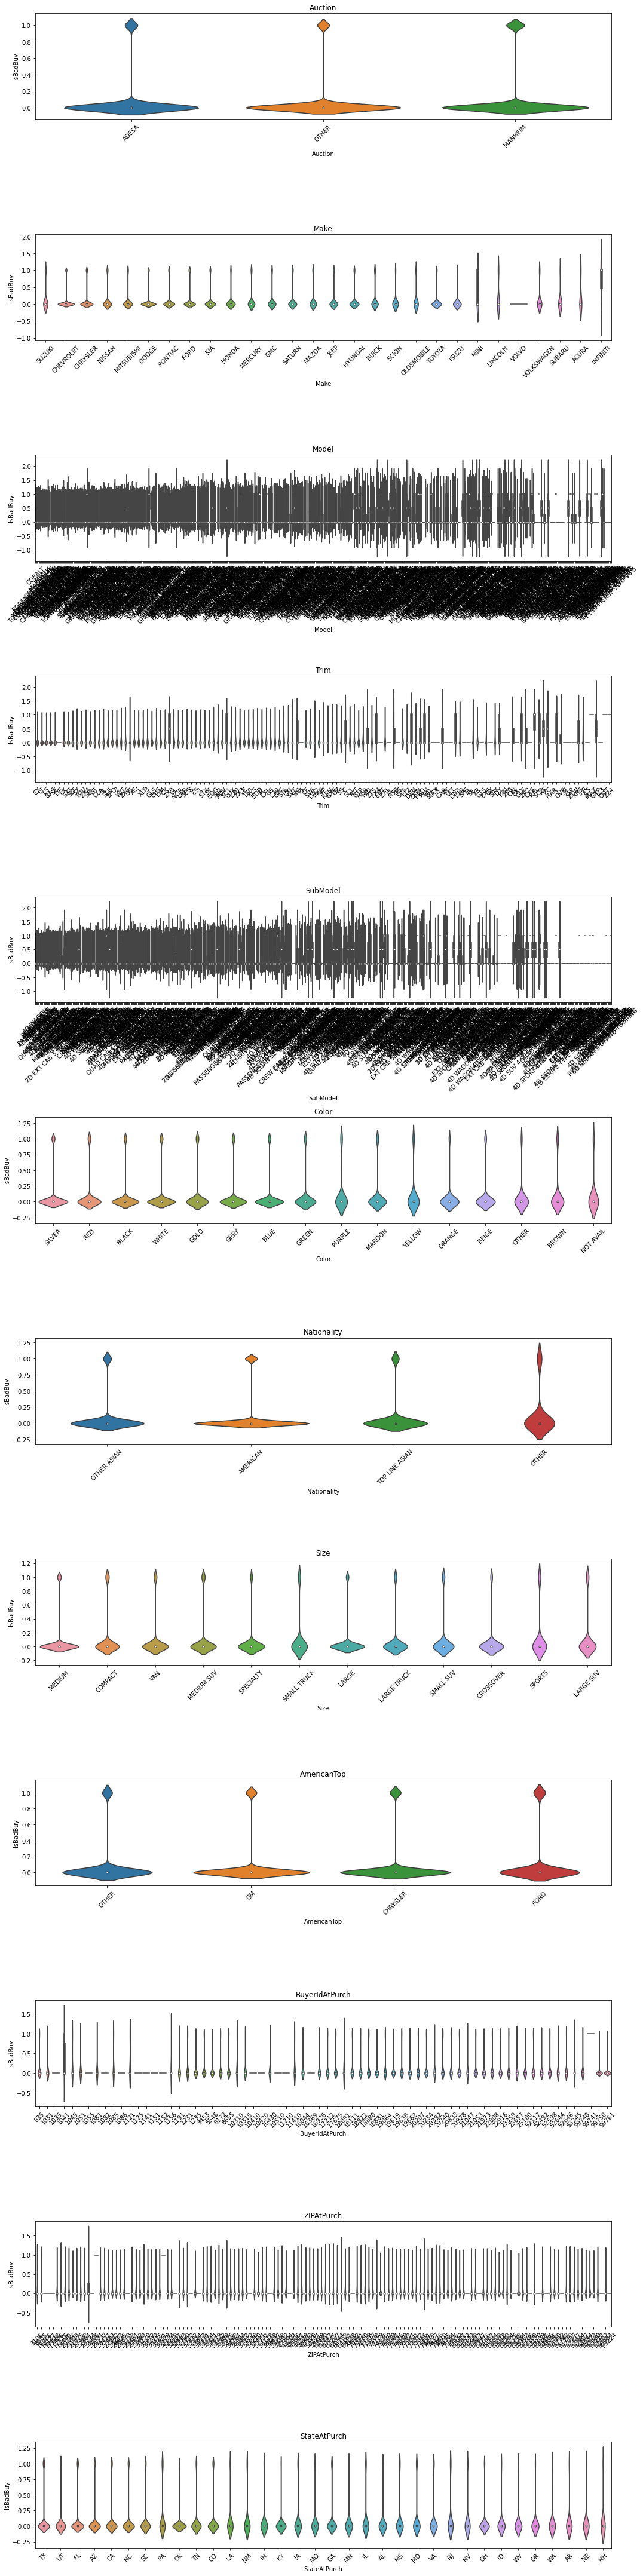

In [15]:
categorical_toCheck = ['Auction', 'Make',
                       'Model', 'Trim',
                       'SubModel', 'Color',
                       'Nationality', 'Size',
                       'AmericanTop', 'BuyerIdAtPurch',
                       'ZIPAtPurch', 'StateAtPurch']
n_features = len(categorical_toCheck)
fig, axs = plt.subplots(figsize=(15, 5 *n_features ), nrows=n_features, ncols=1)
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(categorical_toCheck):
    ax = axs[i]
    sns.violinplot(x=column, y='IsBadBuy', data=df, ax=ax)
    axs[i].set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()

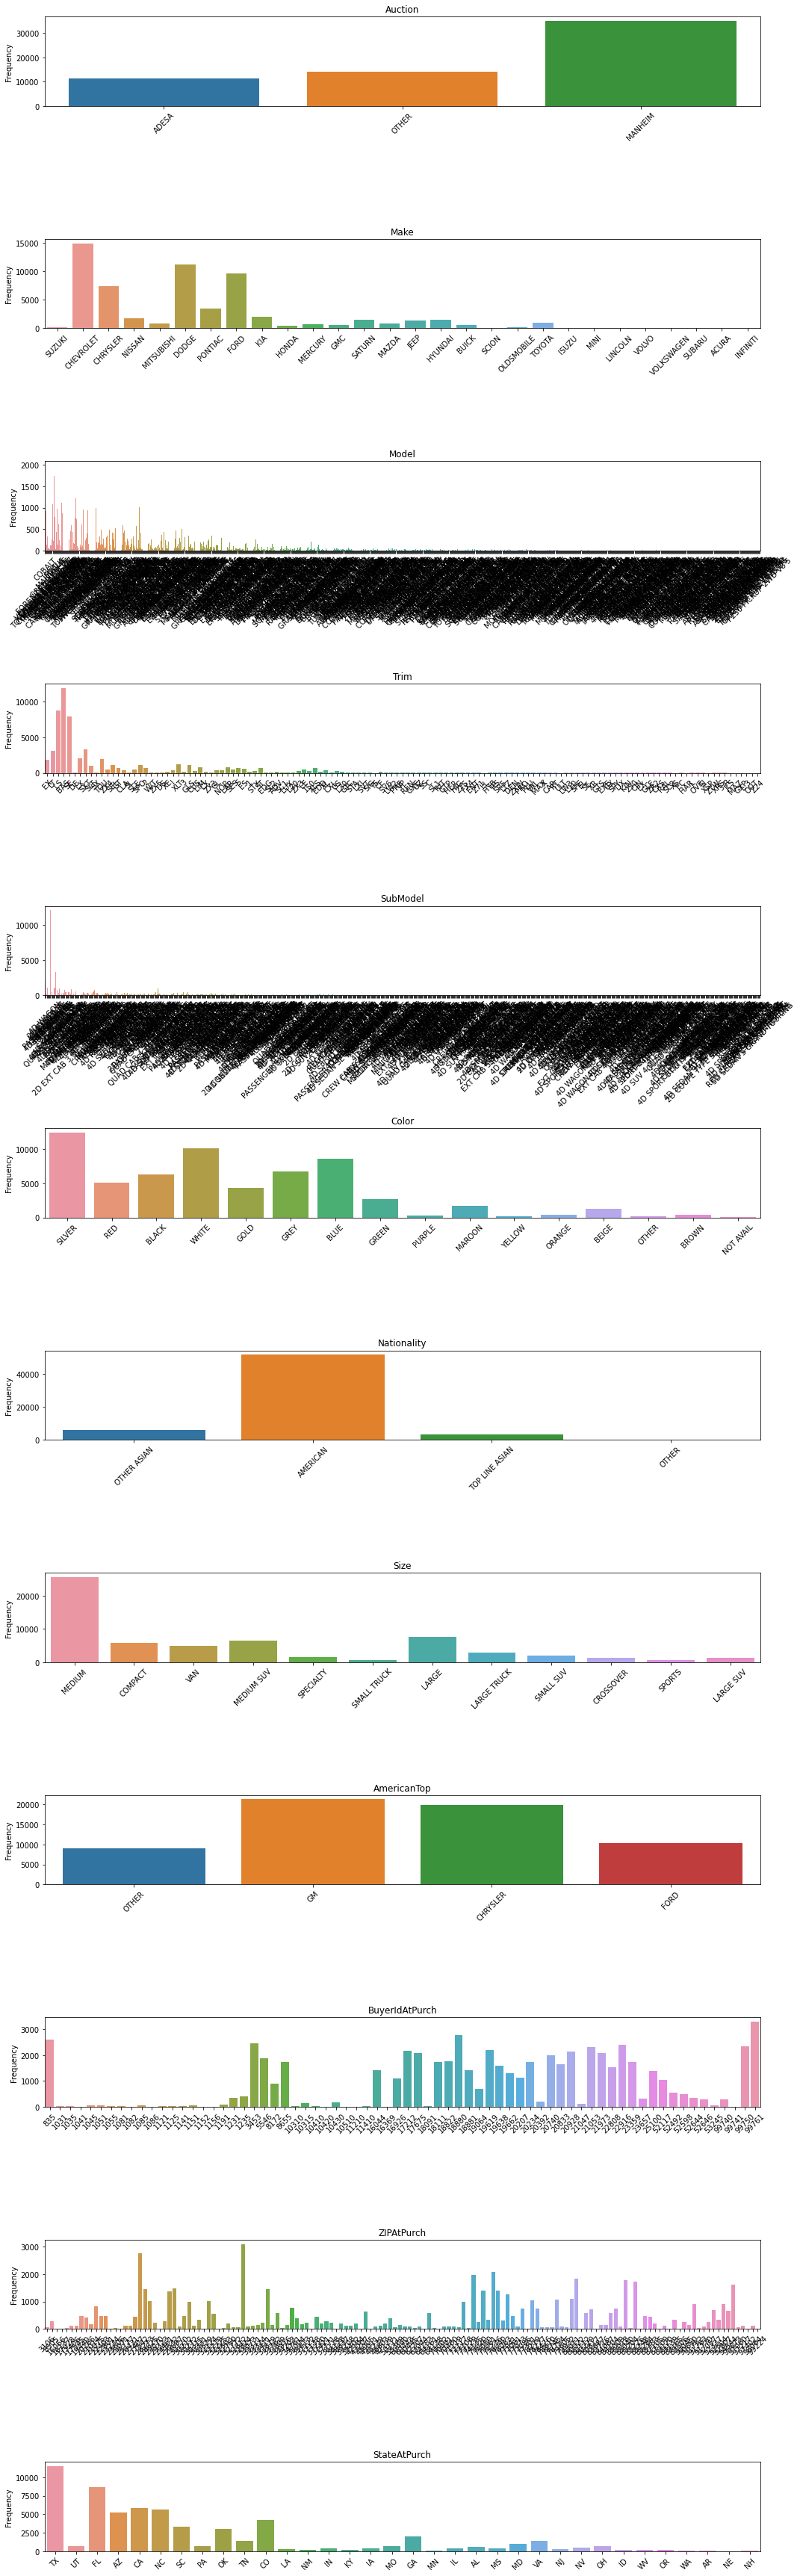

In [16]:
fig, axs = plt.subplots(figsize=(15, 4* n_features), nrows=len(categorical_toCheck), ncols=1)
plt.subplots_adjust(hspace=0.5)

# Loop through categorical columns and create bar plots
for i, column in enumerate(categorical_toCheck):
    sns.countplot(x=column, data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

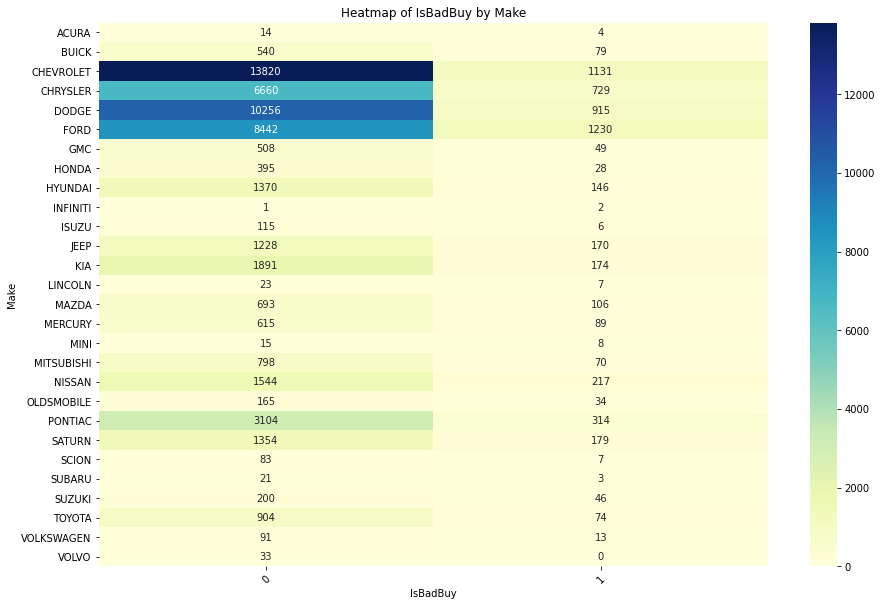

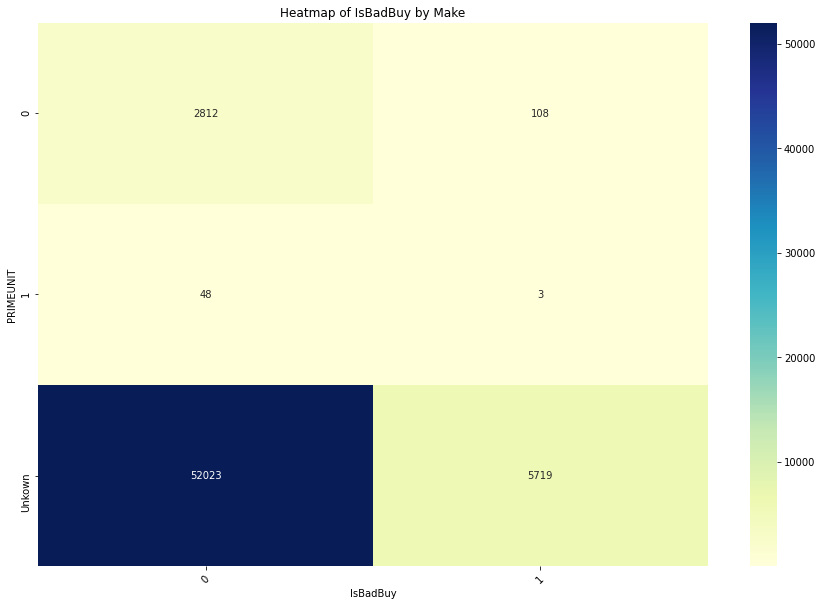

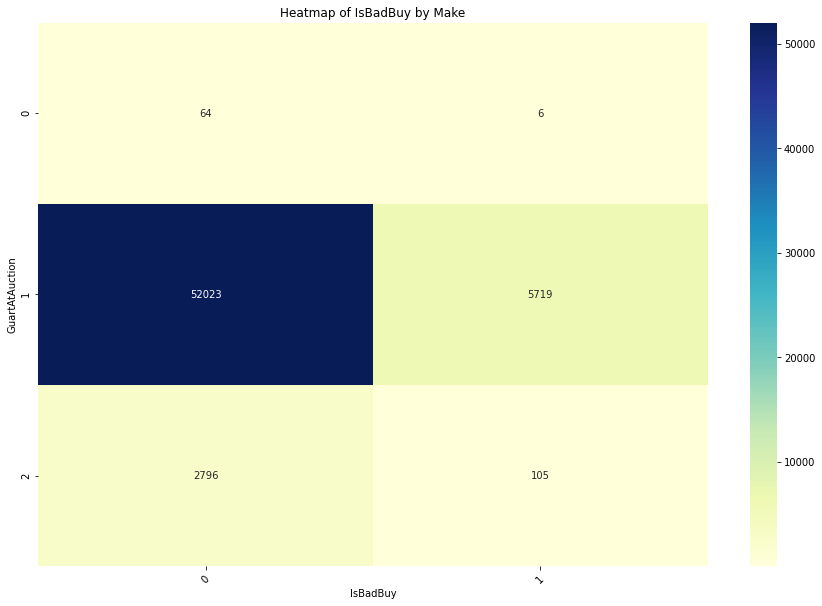

In [17]:
heatmap_data = pd.crosstab(df['Make'], df['IsBadBuy'])
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of IsBadBuy by Make')
plt.xticks(rotation=45)
plt.show()

heatmap_data = pd.crosstab(df['PRIMEUNIT'], df['IsBadBuy'])
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of IsBadBuy by Make')
plt.xticks(rotation=45)
plt.show()

heatmap_data = pd.crosstab(df['GuartAtAuction'], df['IsBadBuy'])
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of IsBadBuy by Make')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Feature Importance or relevante with RandomForest
#rf = RandomForestClassifier()
#rf.fit(df[categorical_columns], df['IsBadBuy'])
#feature_importance = pd.Series(rf.feature_importances_, index=categorical_columns)
#feature_importance.sort_values(ascending=False, inplace=True)
#print("Feature Importance with Random Forest:")
#print(feature_importance)

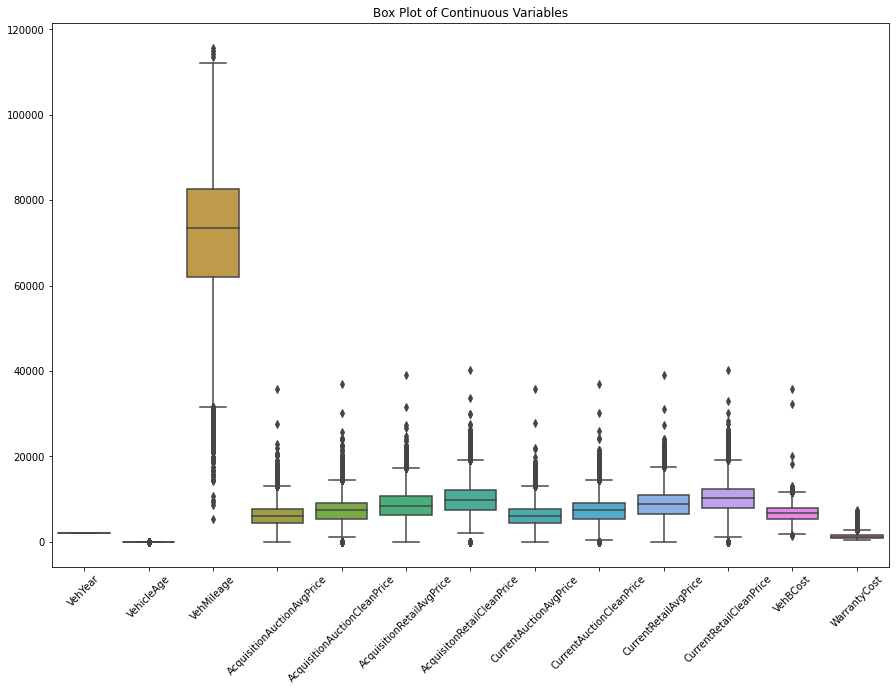

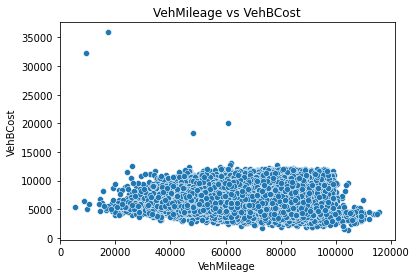

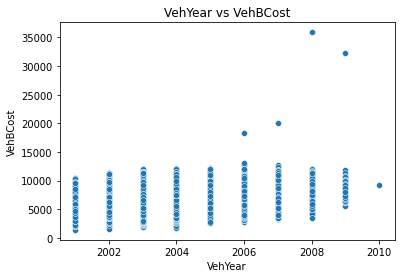

In [19]:
# 3. Box Plot for Continuous Variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[continuous_columns[1:]])
plt.title('Box Plot of Continuous Variables')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter Plot for Two Continuous Variables
sns.scatterplot(x='VehMileage', y='VehBCost', data=df)
plt.title('VehMileage vs VehBCost')
plt.show()

# 5. Scatter Plot for Two Continuous Variables
sns.scatterplot(x='VehYear', y='VehBCost', data=df)
plt.title('VehYear vs VehBCost')
plt.show()

In [20]:
#Code from Alex, sehr gute!
#cont_features= df.select_dtypes(include=["float64", "int64"])

#n_features = len(cont_features.columns) - 1 # Excluding the target column
#fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features)) # Adjust size based on the number of subplots

#plt.subplots_adjust(hspace=0.5)

# Plot each feature's histogram with hue set to the target column
#for i, feature in enumerate(cont_features.columns[1:]): # Loop over feature columns
#    sns.histplot(data=df, x=feature, hue='IsBadBuy', kde=True, ax=axes[i])
#    axes[i].set_title(f'Distribution of {feature} by {df.columns[0]}')

<AxesSubplot:>

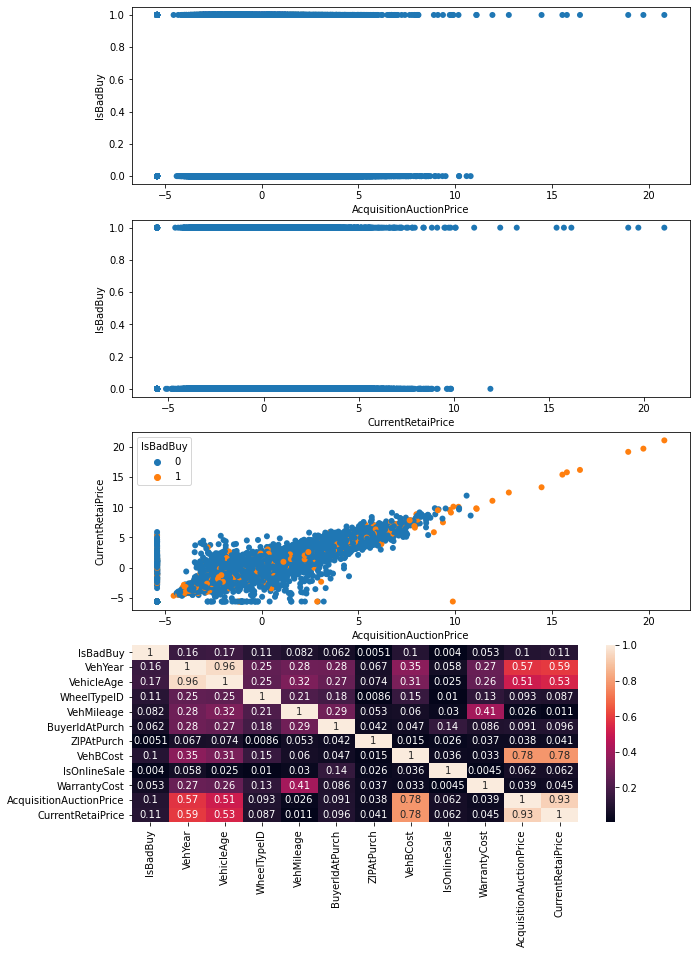

In [122]:
#std_pcaA = Pipeline([('std', StandardScaler()),
#                    ('pca', PCA(n_components=1))])
#std_pcaB = Pipeline([('std', StandardScaler()),
#                    ('pca', PCA(n_components=1))])
#print(df.columns)

#Transform the data
#pca_acq = std_pcaA.fit_transform(df.loc[:, correlated_cols_Acq])
#pca_current = std_pcaB.fit_transform(df.loc[:, correlated_cols_Current])

#Check the value
#display(pca_acq)
#display(pca_current)

# Drop columns from features that are now correlated
#df = df.drop(correlated_cols_Acq, axis=1)
#df = df.drop(correlated_cols_Current, axis=1)

# Add the new PCA values to the features
#df.loc[:, 'AcquisitionAuctionPrice'] = pca_acq
#df.loc[:, 'CurrentRetaiPrice'] = pca_current

df = startOver()
df = clean_data(df)

df = pcaMe(df,correlated_cols_Acq,'AcquisitionAuctionPrice')
df = pcaMe(df,correlated_cols_Current,'CurrentRetaiPrice')

fig, ax = plt.subplots(figsize=(10,15), nrows=4, ncols=1)
sns.scatterplot(data=df,x="AcquisitionAuctionPrice",y="IsBadBuy", palette="Wistia",ax=ax[0], edgecolor="none")
sns.scatterplot(data=df,x="CurrentRetaiPrice",y="IsBadBuy", palette="Wistia",ax=ax[1], edgecolor="none")
sns.scatterplot(data=df,x="AcquisitionAuctionPrice",y="CurrentRetaiPrice", hue='IsBadBuy', 
                ax=ax[2], edgecolor="none")

sns.heatmap(df.corr().abs(), annot=True,ax=ax[3])

In [111]:
from statsmodels.robust import mad

display(mad(df.loc[:, ['AcquisitionAuctionPrice']].T , axis=1))
display(mad(df.loc[:, ['CurrentRetaiPrice']].T , axis=1))

array([1.96942264])

array([1.99408657])

<AxesSubplot:xlabel='AcquisitionAuctionPrice', ylabel='CurrentRetaiPrice'>

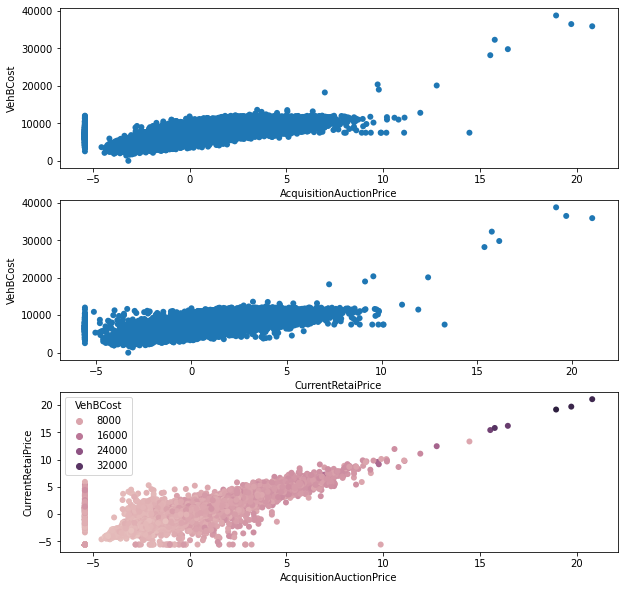

In [112]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=1)
sns.scatterplot(data=df,x="AcquisitionAuctionPrice",y="VehBCost", palette="Wistia",ax=ax[0], edgecolor="none")
sns.scatterplot(data=df,x="CurrentRetaiPrice",y="VehBCost", palette="Wistia",ax=ax[1], edgecolor="none")
sns.scatterplot(data=df,x="AcquisitionAuctionPrice",y="CurrentRetaiPrice", hue='VehBCost', ax=ax[2], edgecolor="none")

In [24]:
distance_to_mean = df.loc[:, 'CurrentRetaiPrice'] - df.loc[:, 'CurrentRetaiPrice'].mean(axis=0)
std_distance_to_mean = distance_to_mean.abs() / df.loc[:, 'CurrentRetaiPrice'].std(axis=0)
sorted(std_distance_to_mean)[:10]

[2.9720300818459433e-05,
 2.9720300818459433e-05,
 4.084894777044477e-05,
 4.95490150836128e-05,
 5.140932818241136e-05,
 5.140932818241136e-05,
 0.00014380842899627228,
 0.00023985228886353764,
 0.00035130205087077174,
 0.00041049891835589526]

In [25]:
distance_to_mean = df.loc[:, 'AcquisitionAuctionPrice'] - df.loc[:, 'AcquisitionAuctionPrice'].mean(axis=0)
std_distance_to_mean = distance_to_mean.abs() / df.loc[:, 'AcquisitionAuctionPrice'].std(axis=0)
sorted(std_distance_to_mean)[:15]

[6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17,
 6.30565688459e-17]

<AxesSubplot:xlabel='ValueCar', ylabel='VehBCost'>

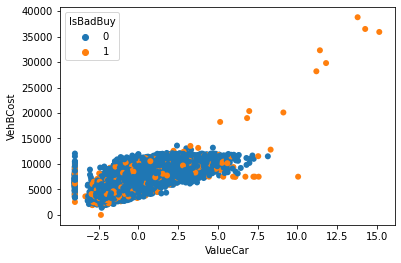

In [118]:
df = pcaMe(df,['AcquisitionAuctionPrice','CurrentRetaiPrice'],'ValueCar')
sns.scatterplot(data=df,x="ValueCar",y="VehBCost", hue='IsBadBuy', edgecolor="none")

<AxesSubplot:>

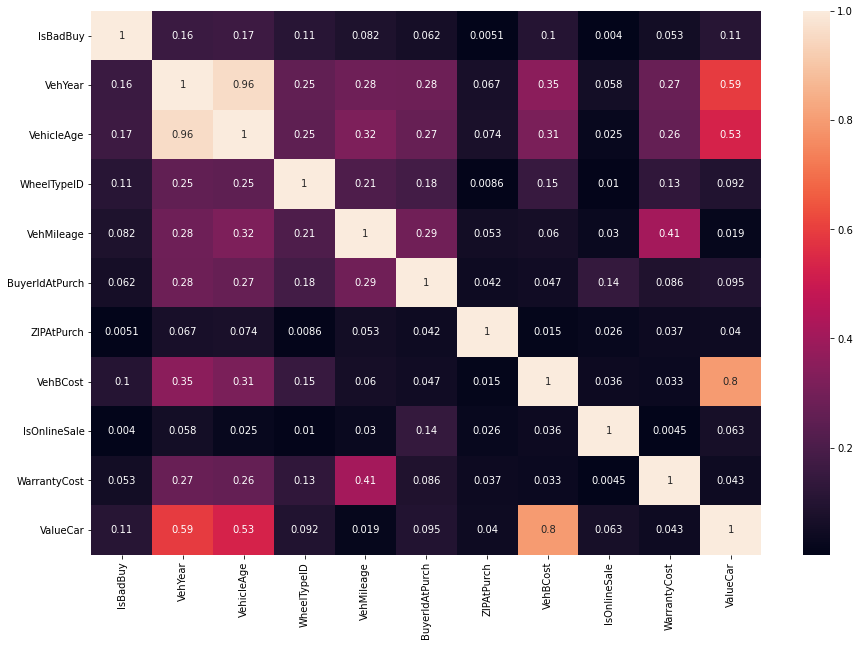

In [120]:
plt.figure(figsize=(15,10)) 

1.482602218505602


<AxesSubplot:xlabel='VehicleAge', ylabel='VehYear'>

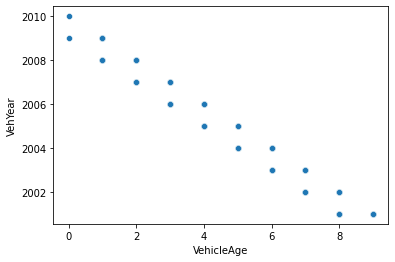

In [27]:
#detecting outliers
print(mad(df.loc[:, 'VehicleAge']))
d_distance = mad(df.loc[:, 'VehicleAge']) * 3

model_outlier = RANSACRegressor(residual_threshold=d_distance, random_state=0)
model_outlier.fit(X=df.loc[:, ['VehYear']], y=df.loc[:, 'VehicleAge'])

ax = sns.scatterplot(x=df.loc[model_outlier.inlier_mask_, 'VehicleAge'],
                     y=df.loc[model_outlier.inlier_mask_, 'VehYear'])

sns.scatterplot(x=df.loc[~model_outlier.inlier_mask_, 'VehicleAge'],
                y=df.loc[~model_outlier.inlier_mask_, 'VehYear'],
                color='orange', ax=ax)

<AxesSubplot:xlabel='AcquisitionAuctionPrice', ylabel='VehYear'>

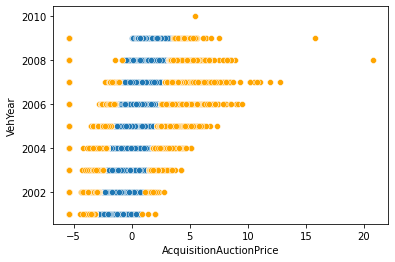

In [28]:
#detecting outliers
d_distance = mad(df.loc[:, 'AcquisitionAuctionPrice'])

model_outlier = RANSACRegressor(residual_threshold=d_distance, random_state=42)
model_outlier.fit(X=df.loc[:, ['VehYear']], y=df.loc[:, 'AcquisitionAuctionPrice'])

ax = sns.scatterplot(x=df.loc[model_outlier.inlier_mask_, 'AcquisitionAuctionPrice'],
                     y=df.loc[model_outlier.inlier_mask_, 'VehYear'])

sns.scatterplot(x=df.loc[~model_outlier.inlier_mask_, 'AcquisitionAuctionPrice'],
                y=df.loc[~model_outlier.inlier_mask_, 'VehYear'],
                color='orange', ax=ax)

In [48]:
onehot = pdp.OneHotEncode(['GuartAtAuction'], drop_first=False)
df_example = onehot.fit_transform(df)

print(df_example.columns)

model_db = DBSCAN(eps=0.12, min_samples=2)
model_db.fit(df_example , df_example.loc[:, 'IsBadBuy'])
model_db.labels_

sns.scatterplot(data =df_example, x='IsBadBuy', y='GuartAtAuction', hue=model_db.labels_).set_title("k-Means Clustering with k=2");


Index(['IsBadBuy', 'PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel',
       'Color', 'Transmission', 'VehMileage', 'Nationality', 'Size',
       'AmericanTop', 'PRIMEUNIT', 'BuyerIdAtPurch', 'ZIPAtPurch',
       'StateAtPurch', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Usage',
       'VehPrice', 'VehYears', 'WheelType', 'GuartAtAuction_GREEN',
       'GuartAtAuction_RED', 'GuartAtAuction_YELLOW'],
      dtype='object')


/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [30]:
pd.crosstab(df['WheelTypeID'], df['WheelType'])

WheelType    ALLOY  COVERS  SPECIAL
WheelTypeID                        
1.0          31390       0        0
2.0              0   28671        0
3.0              0       0      652

In [31]:
#df_test = oneHotCodeMe(df,'Model')

#from sklearn.preprocessing import StandardScaler
#standardizer = StandardScaler()
#df_test = standardizer.fit_transform(df_test)
#arr_dist = euclidean_distances(standardizer.transform(df))
#arr_sorted = np.sort(arr_dist, axis=1)

#fig, ax = plt.subplots()
#ax.plot(range(len(arr_dist_sorted)), np.sort(arr_dist_sorted[:, 16]))
#ax.set(title='Sorted distances to 16th neighbor', xlabel='Data points', ylabel='Distance to 16th neighbor')

**Congratulations**:
Now you have a better insight into your data! This can help you as you work through the project.


## Training/test split

In this project you need the training data as well as the test and target data. 

We haven't specified the test data for you. So at this point, we recommend that you split the data into a training and test data set, and work with the **training set** as if this were all the data you have available.
Once you've finished building your model, you can use the **test set** to simulate what happens when new data enters your data pipeline, for example, when new cars go on sale on auction platforms.

Remember, **only ever fit to the training set!** This also applies for data cleaning and feature engineering. Ideally, you should only touch your test set once, after you've built and evaluated the best model for you and want to know how well it performs on new data. Just pretend you don't have the test set.

Use `train_test_split` from the submodule `sklearn.model_selection` to split the data into test and training data sets. Pass the following parameters: `random_state = 42, test_size = 0.1` so that you can later compare your predictions with our model and get an initial estimate. Also save `features_test` as *features_test.csv*.


In [3]:
def startOver():
    df = pd.read_csv("data_train.csv")
    df.columns = readableCols
    return df

In [4]:
# perform train-test-split
from sklearn.model_selection import train_test_split

df = startOver()

target = df.loc[:,'IsBadBuy']
features = df.drop('IsBadBuy', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=42,
                                                                            test_size = 0.1)

In [5]:
def splitDataSets(df):
    target = df.loc[:,'IsBadBuy']
    features = df.drop('IsBadBuy', axis=1)
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=42,
                                                                            test_size = 0.1)
    return features_train, features_test, target_train, target_test

In [6]:
# save features_test as 'features_test.csv'
features_test.to_csv('features_test.csv')

**Congratulations**:
Now you have a training data set. You can use this to create new features and to train the building blocks of your model.


## Data preparation


The goal of data preparation is to find a way to clean the data sets for your model (*Data Cleaning*) and to put them into a readable format for your model (*Datatype Transformation*). Once you've completed these steps, you can begin to select a training set that is as representative as possible (sampling).


### Transforming data types


In [ ]:
df = features_train.copy()

### Data imputation


In contrast to the last project there are relatively many missing values in the data. This also applies to the test and target data. For the test and target data, you should classify **every** data point. So you shouldn't remove any data points from them because of missing or improbable values. Instead, you could replace the missing values or remove features with many missing values.

**Tip**: You cannot assume that missing values in *features_aim.csv* are in the same columns as in *data_train.csv*. So you need strategies for each column. To fill the missing  values of multiple columns with different values at the same time, you can pass a `dict` to the `my_df.fillna()` method, with *keys* corresponding to the column names. The *values* are the corresponding values.


In [10]:
def clean_data(df):
    """Returns cleaned DataFrame.

    Transform datatypes:
        -transform 'pickup_datetime' to datetime format
        -transform categorical colums

    Transform datatypes:
        -transform 'pickup_datetime' to datetime format

    Clean-data:
        -Clean Nan from importan columns
        -Reassigned default values

    Args:
        df (pd.DataFrame) : uncleaned DataFrame
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    """
 
    #to datetime
    df['PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

    # UpperCase
    df = df.applymap(lambda s: s.upper() if type(s) == str else s)

    #no NaNs, so no more steps necessary    
    #df.loc[:, 'PRIMEUNIT'].fillna('Unkown', inplace=True)
    df.loc[:, 'PRIMEUNIT'].fillna('No', inplace=True)
    df.loc[:, 'GuartAtAuction'].fillna('YELLOW', inplace=True)

    #dict_GuartAtAuction = {'GREEN': 2, 'YELLOW': 1,  'RED': 0}
    #df.loc[:, 'GuartAtAuction'] = df.loc[:, 'GuartAtAuction'].replace(dict_GuartAtAuction)

    dict_PRIMEUNIT = {'YES': 1, 'NO': 0}
    df.loc[:, 'PRIMEUNIT'] = df.loc[:, 'PRIMEUNIT'].replace(dict_PRIMEUNIT)

    #Nan for price wise features
    impute_knn= KNNImputer(n_neighbors=5)
    col_num = correlated_cols_Acq + correlated_cols_Current
    imputed_data= impute_knn.fit_transform(df[col_num])
    imputed_df= pd.DataFrame(imputed_data, columns=col_num, index=df.index)
    df= pd.concat([df.drop(columns=col_num), imputed_df], axis=1)

    #Default Values
    for col in df.select_dtypes(include=['int', 'float']):
        df.loc[:, col].fillna(df.loc[:, col].mode().iloc[0], inplace=True)
    #for col in df[continuous_columns]:
    #    df.loc[:, col].fillna(df.loc[:, col].modeean(), inplace=True)

    for col in df.select_dtypes(include=['object', 'category']):
        df.loc[:,col] = df.loc[:,col].astype('category')

    #df = df.dropna(subset=[ 'Trim','SubModel','Color','Transmission','WheelTypeID','WheelType','Nationality',
    #                  'Size','VehBCost'])

    return df


In [12]:
def startOver_withClean():
    df = pd.read_csv("data_train.csv")
    df.columns = readableCols
    display(df.columns)
    return clean_data(df)

In [7]:
def pcaMe(dfPCA, columns, newColumnName):
    std_pca = Pipeline([('std', StandardScaler()),
                        ('pca', PCA(n_components=1))])

    #Transform the data
    pca_acq = std_pca.fit_transform(dfPCA.loc[:, columns])

    #Drop old columns
    dfPCA = dfPCA.drop(columns=columns)
    
    # Add the new PCA values to the features
    dfPCA.loc[:, newColumnName] = pca_acq
    return dfPCA


In [8]:
def diffLists(listA, listB):
    return set(listB) - set(listA)

def oneHotCodeMe(dfHot, columns):
    onehot = pdp.OneHotEncode(columns, drop_first=False)
    df_onehot = onehot.fit_transform(dfHot)
    return df_onehot

#startOver()
#dfHot = oneHotCodeMe(df,['Model'])
#newCols = diffLists(df.columns,dfHot.columns)
#df = pcaMe(dfHot, newCols, 'Model')
#df.head()

In [9]:
def datetimeMe(df, column, newName):
    df[newName +'Year'] = df[column].dt.year
    df[newName +'Month'] = df[column].dt.month
    df[newName +'Day'] = df[column].dt.day
    return  df.drop(column, axis=1)

### Dealing with outliers


* Are there any outliers in the training set ? - How should you deal with them?


In [10]:
#ransac ...
def ransacMe(df, features, target, residual):
    # Define a linear regression model
    pipe = Pipeline([('std', StandardScaler()),( 'ltd', LinearRegression())])
    #model = pipe(StandardScaler(), LinearRegression())

    # Initialize RANSACRegressor
    ransac = RANSACRegressor(base_estimator=pipe, residual_threshold=residual)
    ransac.fit(df.loc[:,features], df.loc[:,[target]])

    # Obtain the mask of inliers and outliers from RANSAC
    inlier_mask = ransac.inlier_mask_
    outlier_mask = ~inlier_mask

    # Filter out outliers from the DataFrame
    filtered_df = df[inlier_mask]

    # Optionally, you can also obtain the outliers in a separate DataFrame
    outliers_df = df[outlier_mask]

    # Now, filtered_df contains the DataFrame with outliers removed
    # outliers_df contains the DataFrame with only the outliers
    return filtered_df

#Testing method
#df = startOver()
#std_pca = Pipeline([('std', StandardScaler()),
#                    ('pca', PCA(n_components=1))])
#pca_acq = std_pca.fit_transform(df.loc[:, correlated_cols_Acq])
#df.loc[:, 'AcquisitionAuctionPrice'] = pca_acq

#df = ransacMe(df,['AcquisitionAuctionPrice'],'IsBadBuy')
#df.head()

In [11]:
def dbscanMe(df, numerical_feature, epsilon, min_samples):
    # Extract the numerical feature from the DataFrame
    X = df[numerical_feature].values.reshape(-1, 1)  # Reshape to 2D array for DBSCAN

    # Initialize DBSCAN
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

    # Fit DBSCAN to the numerical feature
    dbscan.fit(X)

    # Obtain cluster labels
    labels = dbscan.labels_

    # Filter out outliers (points with cluster label -1)
    inlier_indices = labels != -1

    # Filter the DataFrame to remove outliers
    filtered_df = df[inlier_indices]

    return filtered_df

#filtered_data = dbscanMe(df, ['Models'], epsilon=0.1, min_samples=1)
#filtered_data.head()

**Important:**
If you decide to delete outliers, only do this only in the training set. And **do not** add this step to your pipeline or cleaning function. Otherwise, you may not be able to get a prediction for every value in *features_aim* when you finish the project.


To easily reproduce your cleanup steps with the test and target data, you should define a function that performs the respective steps for you. Name your function `clean_data`. It should take the uncleaned `pandas.DataFrame` as an argument and output the cleaned `panda.DataFrame`. Make sure that no data points are deleted, because in the target data set, you should make a prediction for each value.


In [ ]:
#Removing outliers and cleaning the datatrain set
df  = clean_data(df)
display(df.shape)

#first the median absolute deviation
#dist = mad(df.loc[:, correlated_cols_Acq])

#display(dist.mean())
#df = ransacMe(df, correlated_cols_Acq, 'IsBadBuy', dist.mean())
#df = ransacMe(df, correlated_cols_Current, 'IsBadBuy', mad(df.loc[:, correlated_cols_Current]).mean())

#df = dbscanMe(df, categorical_columns, 'IsBadBuy', epsilon=0.5, min_samples=20)
def reducingOutliers(df):
    df = ransacMe(df, correlated_cols_Acq, 'IsBadBuy', mad(df.loc[:, correlated_cols_Acq]).mean())
    df = ransacMe(df, correlated_cols_Current, 'IsBadBuy', mad(df.loc[:, correlated_cols_Current]).mean())
    return df

display(reducingOutliers(df).shape)

**Congratulations**:
You've cleaned your data and packed these steps into a function. So you can easily repeat the data cleaning if necessary.


### Resample


As you may have noticed, the target categories in the data set are very unbalanced. So it may be necessary to resample your training data set. In *Imbalanced Target Categories* (Module 2 Chapter 3) you learned about different resampling methods and also how to use `imblearn.pipeline` to test different sampling methods.


In [78]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

def resampling(features_train, features_test, target_train, target_test, columns):
    tree_clf = DecisionTreeClassifier(random_state=42)
    search_space = {'estimator__max_depth': range(2, 10, 2), 'estimator__class_weight': [None, 'balanced']}

    features_train = features_train[columns]
    features_test = features_test[columns]

    smotesampler = SMOTE()
    smotesampler.fit(features_train,target_train)

    oversampler = RandomOverSampler(random_state=42)
    undersampler = RandomUnderSampler(random_state=42)

    # 'passthrough', which both sklearn pipelines and the imblearn interpret "skip this step
    samplers = [('oversampling', oversampler),
            ('undersampling', undersampler),
            ('SMOTE', smotesampler),
            ('class_weights', 'passthrough')]

    # storage container for results
    results = []

    # go through every sampler
    for name, sampler in samplers:
        #sampling
        pipe = Pipeline([('sampler', sampler),
                         ('estimator', tree_clf)])

        #gridsearch and CV
        grid = GridSearchCV(estimator=pipe,
                            param_grid=search_space,
                            n_jobs=-1,
                            cv=5,
                            scoring='f1')

        grid.fit(features_train, target_train)

        #evaluation
        model = grid.best_estimator_.named_steps['estimator']
        recall = recall_score(target_test, model.predict(features_test))
        precision = precision_score(target_test, model.predict(features_test))

        #verbose
        print(name.upper())
        print(grid.scoring, 'on Validationset:', grid.best_score_)
        print("precision :", precision)
        print("recall :", recall)
        print(model)
        print('#'*11)

        #save
        scores = {'name': name,
                  'precision': precision,
                  'recall': recall}
        results.append(scores)

    #show results
    return pd.DataFrame(results)

In [82]:
df = startOver()
features_train, features_test, target_train, target_test = splitDataSets(df)

In [85]:
resampling(clean_data(features_train).drop(columns=['PurchDate']),
           clean_data(features_test).drop(columns=['PurchDate']),
           target_train, target_test, continuous_columns)

OVERSAMPLING
f1 on Validationset: 0.27362150360371185
precision : 0.1872791519434629
recall : 0.6264775413711584
DecisionTreeClassifier(max_depth=4, random_state=42)
###########
UNDERSAMPLING
f1 on Validationset: 0.27192257981827345
precision : 0.19027402547279043
recall : 0.58274231678487
DecisionTreeClassifier(max_depth=2, random_state=42)
###########
SMOTE
f1 on Validationset: 0.2645818530729349
precision : 0.17345715997603356
recall : 0.6843971631205674
DecisionTreeClassifier(max_depth=2, random_state=42)
###########
CLASS_WEIGHTS
f1 on Validationset: 0.2732889967443963
precision : 0.19027402547279043
recall : 0.58274231678487
DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)
###########


name  precision  recall
0   oversampling       0.19    0.63
1  undersampling       0.19    0.58
2          SMOTE       0.17    0.68
3  class_weights       0.19    0.58

In [24]:
#features_train_test = clean_data(pd.concat([features_train, target_train], ignore_index=True))
#features_test_test = clean_data(pd.concat([features_test, target_test], ignore_index=True))

#resampling(reducingOutliers(features_train_test),
#           reducingOutliers(features_test_test),
#           target_train, target_test, continuous_columns[1:])

## Modeling


Now let's get to the core task of a Data Scientist, building machine learning models. As you have already learned in this course, optimizing a model is an iterative process. So you will certainly perform the following steps more than once.


### Build a simple baseline model


Before you now focus on creating and selecting new features, you should first see where to start your efforts and create a first simple model without any hyperparameter optimization. So you can always check afterwards whether the following model optimization steps result in an improvement. The best approach is to create a pipeline that does the modeling as well as encoding the non-numerical features. We suggest using the following steps:

1. Define numerical features (`num_cols`) and categorical features (`cat_cols`).
3. Select the algorithm for the baseline model and instantiate it as `model`.
3. Create pipeline (`model_baseline`) according to the outline below.
4. Use the cleaned and, if necessary, filtered `features_train` and the corresponding `target _train` to *fit*.
5. Make predictions based on `features_test` using `model_baseline`.


<img src="03_05_01_pic1_baselinepipe.png">


In [84]:
# define num_cols and cat_cols
categorical_columns = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
                       'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'AmericanTop', 'PRIMEUNIT',
                       'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch', 'StateAtPurch', 'IsOnlineSale']

continuous_columns = ['VehYear', 'VehicleAge', 'VehMileage',
                       'AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',
                       'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice',
                       'CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',
                       'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice',
                      'VehBCost', 'WarrantyCost']

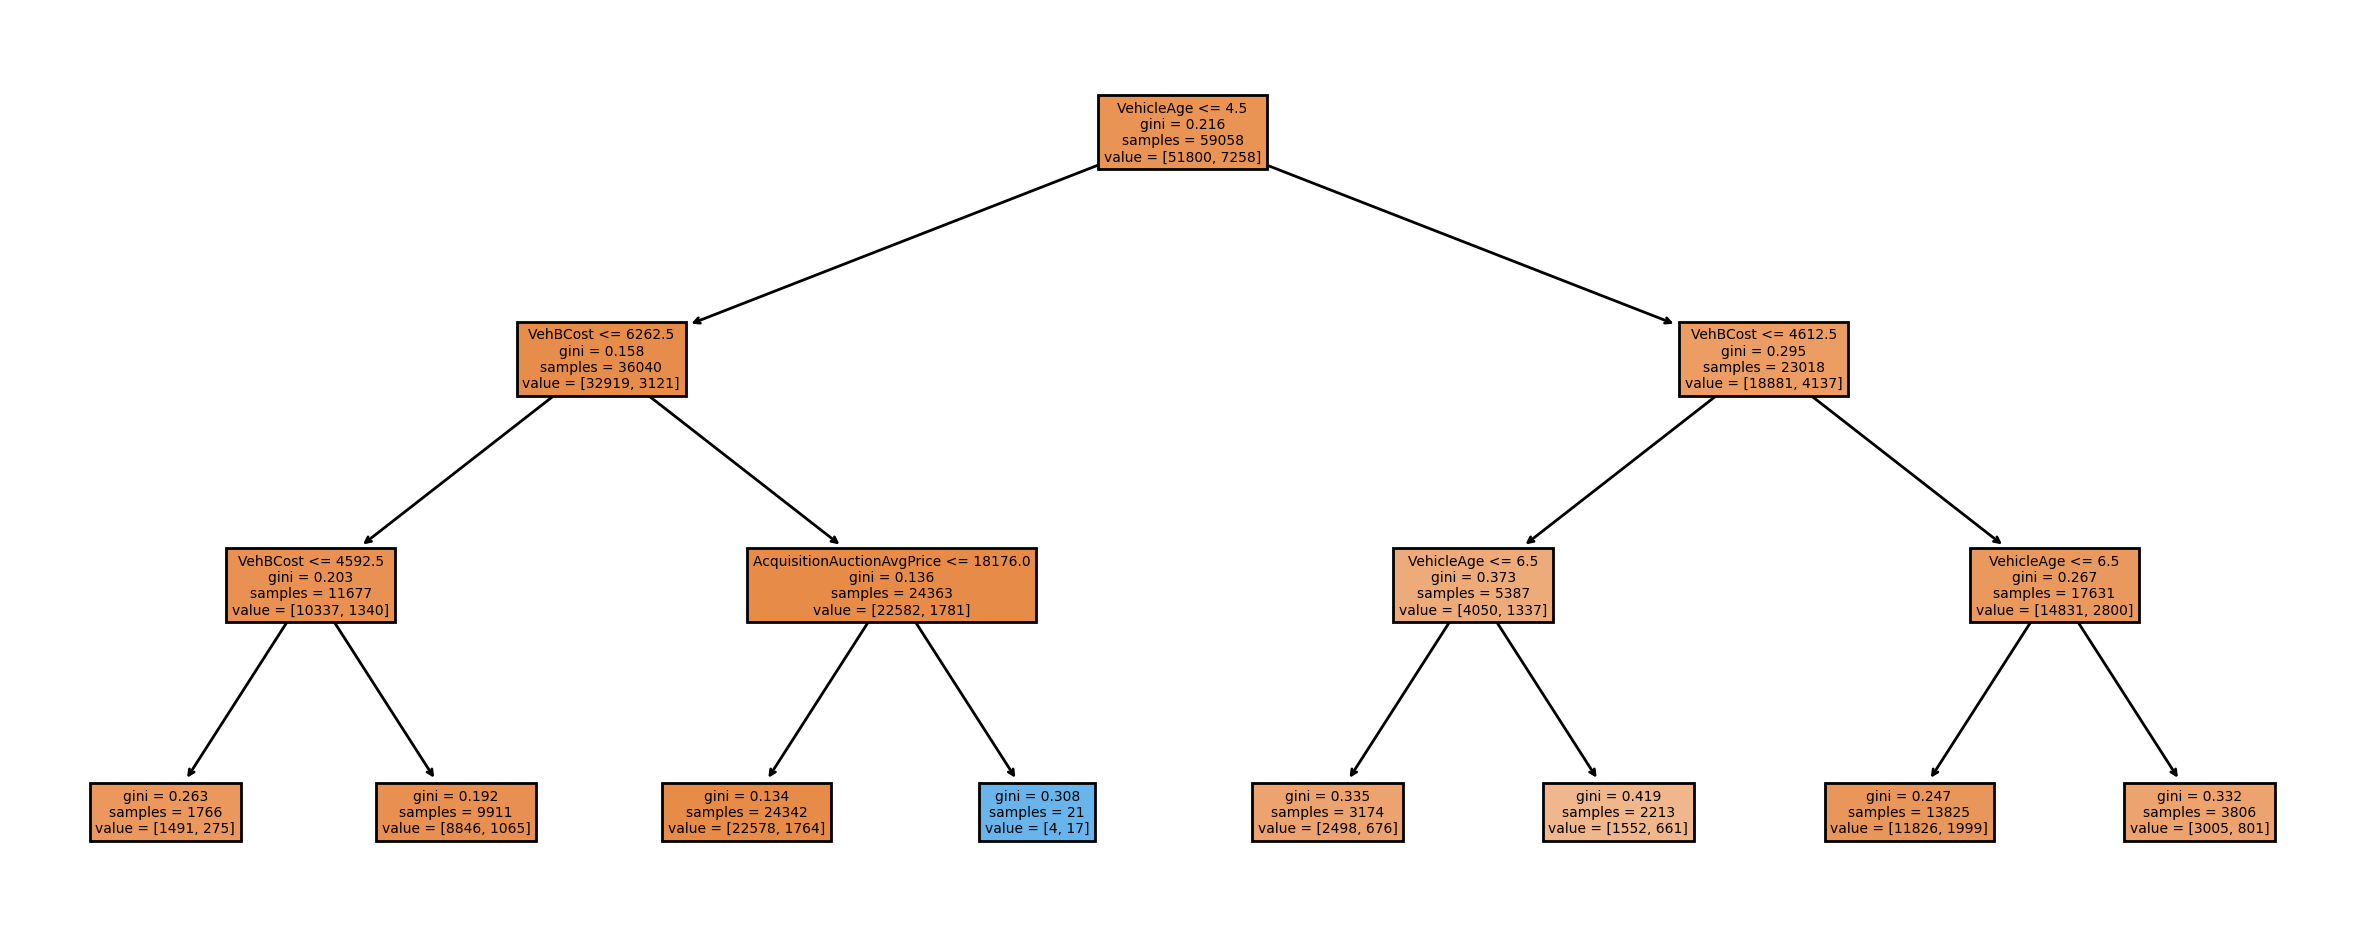

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

df = startOver()
features_train, features_test, target_train, target_test = splitDataSets(df)

features_train = clean_data(features_train)
modelDTree = DecisionTreeClassifier(max_depth=3, random_state=0)
modelDTree.fit(features_train[continuous_columns], target_train)

plt.figure(figsize=[15,6], dpi=200)
plot_tree(modelDTree, feature_names=features_train[continuous_columns].columns, filled=True);
plt.savefig('DecisionTreeClassifier.jpeg')

Precision:  0.1285802279026794
Recall:  0.9869976359338062


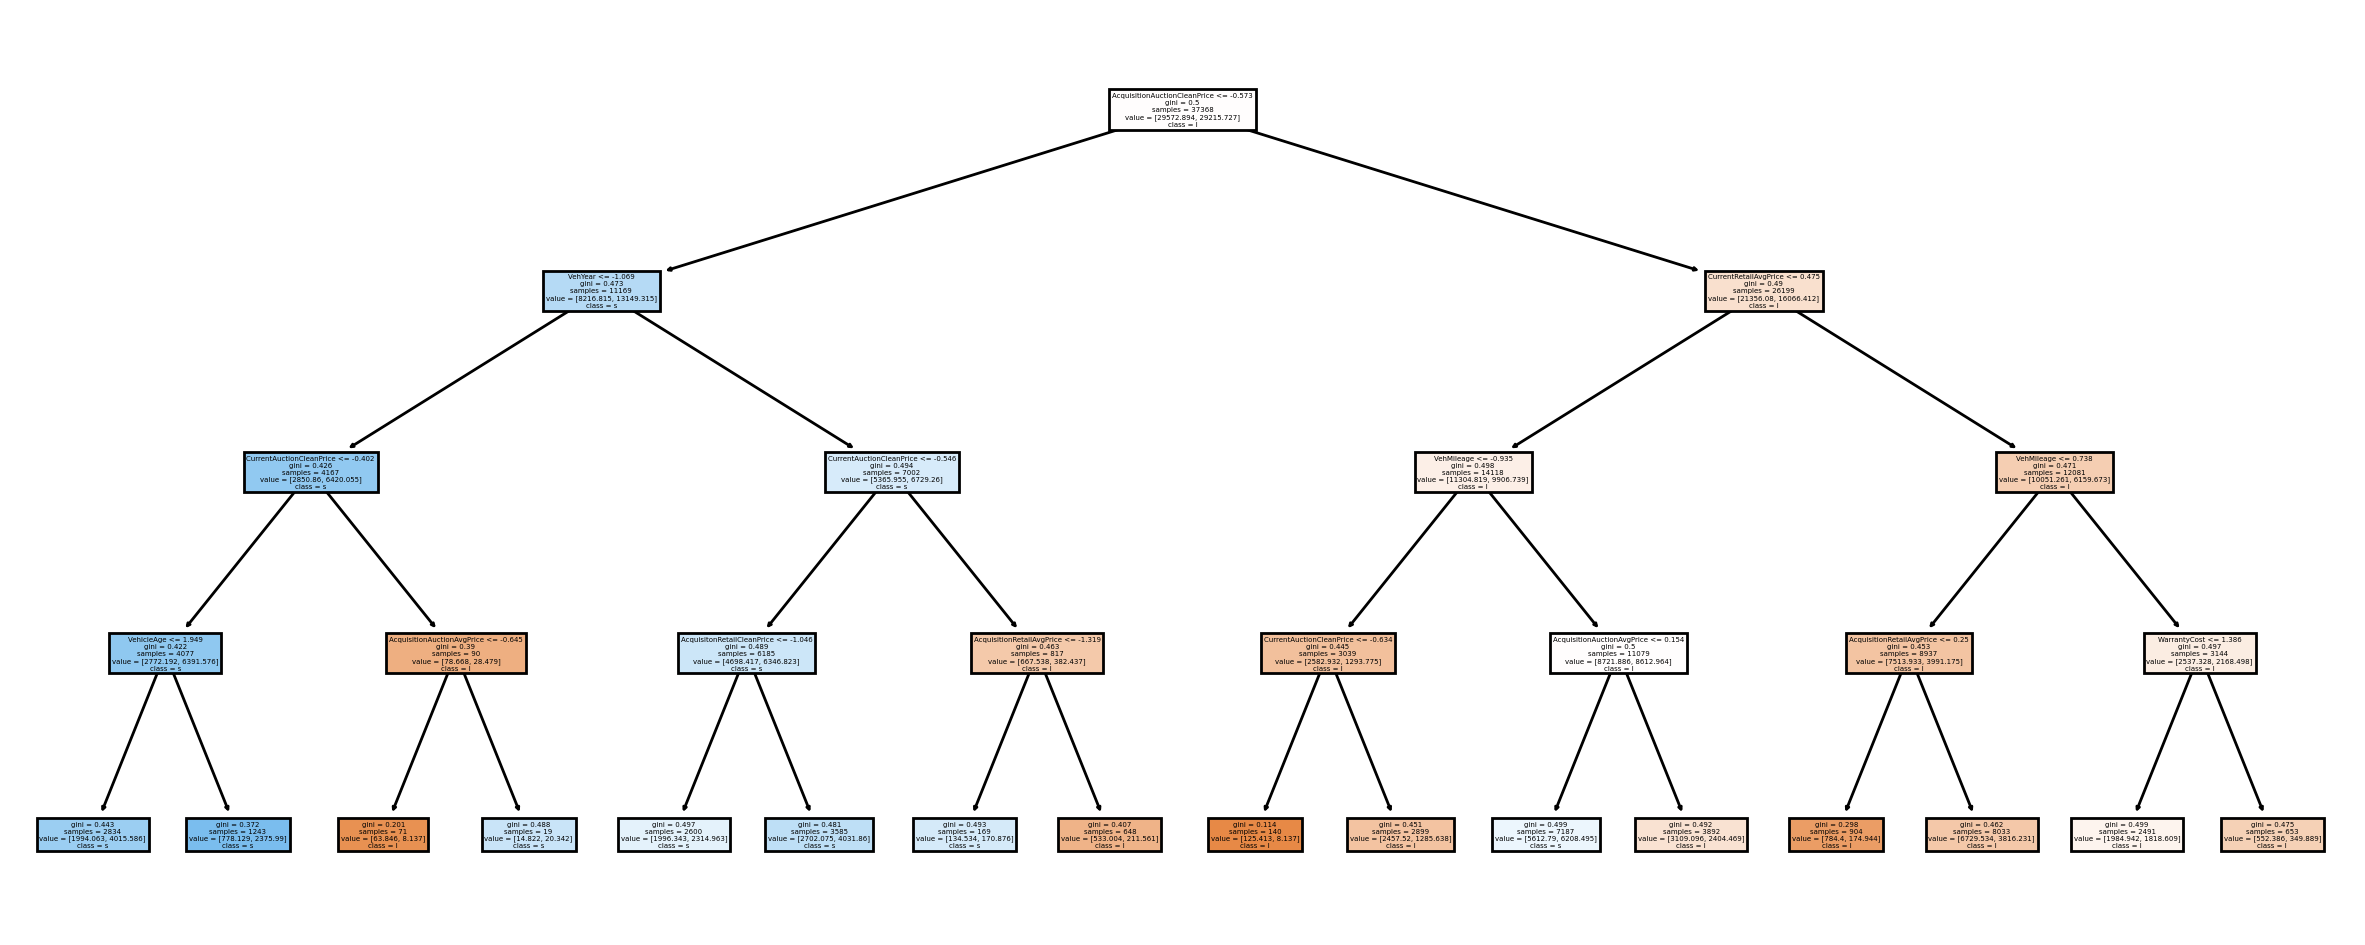

In [27]:
# instantiate model
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as Imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree

df = startOver()
features_train, features_test, target_train, target_test = splitDataSets(df)

model_rf = RandomForestClassifier(n_estimators=100, max_depth=4, class_weight='balanced', random_state=42)

ct = ColumnTransformer(transformers=[('num', StandardScaler(), continuous_columns),
                                     #('cat', OneHotEncoder(), categorical_columns)
                                    ],
                                    remainder='passthrough')

features_train = pd.DataFrame(clean_data(features_train)[continuous_columns])
features_test = clean_data(features_test)[continuous_columns]

features_train = ct.fit_transform(features_train)
model_rf.fit(features_train,target_train)

predictRandomForest = model_rf.predict(features_test)

print('Precision: ', precision_score(target_test, predictRandomForest))
print('Recall: ', recall_score(target_test, predictRandomForest))

plt.figure(figsize=[15,6], dpi=200)
#plot_tree(model_rf, feature_names=continuous_columns, filled=True);
#plt.savefig('RandomForestClassifier.jpeg')

tree.plot_tree(model_rf.estimators_[0],
               feature_names = continuous_columns, 
               class_names='IsBadBuy',
               filled = True);
plt.savefig('rf_individualtree.png')

In [44]:
# build pipeline


In [45]:
# fit pipeline to cleaned (and filtered) training set


In [46]:
# predict and evaluate on test set


**Congratulations**:
You've created a baseline model and can now work on improving the metrics.


### Feature engineering


The data set already offers some features. However, many of them are text-based and therefore not yet usable for most models. When creating new features, keep in mind that the computing time and memory requirements of your models increase with each additional feature. Most car models have a confusingly large number of different versions, sub-models and trim levels. The car dealer's experience to date, however, shows that the influence of the car brand on a cars resell value clearly outweighs the influence of the car model itself.


In [27]:
def engineer_features(df):
    #Extract Body type from submodel
    def classify_body_type(submodel):
        import re
        patterns = {
            'Sedan': 'SEDAN|STRATUS',
            'Coupe': 'COUPE',
            'SUV': 'SUV|SPORT UTILITY|UTILITY|XUV|CUV|CROSSOVER|JEEP|FREESTAR|HARDTOP',
            'Minivan': 'MINIVAN|MAZDA5',
            'Wagon': 'WAGON',
            'Hatchback': 'HATCHBACK|LIFTBACK|HATCKBACK',
            'Pickup': 'CAB|PICKUP',
            'Passenger': 'PASSENGER',
            'Van': 'VAN',
            'Sport':'SPORT|CONVERTIBLE|SPYDER|ROADSTER'
            }
        for key, pattern in patterns.items():
            if re.search(pattern, submodel, re.IGNORECASE):
                return key
        return 'Other'

    #df['BodyType'] = df['SubModel'].apply(classify_body_type)

    # label encoding
    df['PRIMEUNIT'] = df['PRIMEUNIT'].apply(lambda x: 1 if x == 'NO' else 0)

    #Create car use by dividing Odometer by Vehicle Age
    df['Usage'] = df['VehMileage'] / (df['VehicleAge']+1)

    #df = pcaMe(df,correlated_cols_Acq,'AcquisitionAuctionPrice')
    #df = pcaMe(df,correlated_cols_Current,'CurrentRetaiPrice')

    df = pcaMe(df, correlated_cols_Acq + correlated_cols_Current, 'VehPrice')
    df = pcaMe(df, ['VehicleAge','VehYear'], 'VehYears')

    #WheelType Columns
    dfHot = oneHotCodeMe(df, ['WheelTypeID','WheelType'])
    newCols = diffLists(df.columns,dfHot.columns)
    df = pcaMe(dfHot, newCols, 'WheelType')

    df['PurchDate' +'Year'] = df['PurchDate'].dt.year
    df['PurchDate' +'Month'] = df['PurchDate'].dt.month
    df['PurchDate' +'Day'] = df['PurchDate'].dt.day
    
    df = pcaMe(df, ['PurchDateYear','PurchDateMonth','PurchDateDay'], 'PurchDate')

    df.drop(columns=['VehMileage','PurchDate'])
    return df

Now you've created or deleted some new features and modified the training data. In order to be able to do the same with new data sets, you should copy the steps you performed into a function. Call this function `engineer_features`.


In [29]:
df = startOver()
df = clean_data(df)
df = engineer_features(df)

df.shape

(65620, 25)

**Congratulations**:
Now with the new features, you have a good basis for a first real model!


### Data scaling


Models usually perform better if you scale the data first. The best way to do this is to use the *transformer* from `sklearn.preprocessing`. You can instantiate it here, test it and then add it to your pipeline later.


In [30]:
pd.set_option('precision', 2)
df.describe()

IsBadBuy  PurchDate  VehMileage  PRIMEUNIT  BuyerIdAtPurch  ZIPAtPurch  \
count  65620.00   6.56e+04    65620.00    65620.0        65620.00    65620.00   
mean       0.12   1.15e-17    71505.93        0.0        26363.52    58090.45   
std        0.33   1.04e+00    14582.98        0.0        25733.11    26147.50   
min        0.00  -2.35e+00     5368.00        0.0          835.00     3106.00   
25%        0.00  -7.33e-01    61844.75        0.0        17212.00    32124.00   
50%        0.00   4.42e-03    73378.50        0.0        19662.00    73129.00   
75%        0.00   7.51e-01    82440.00        0.0        22808.00    80022.00   
max        1.00   2.37e+00   115717.00        0.0        99761.00    99224.00   

       VehBCost  IsOnlineSale  WarrantyCost     Usage  VehPrice  VehYears  \
count  65620.00      65620.00      65620.00  65620.00  6.56e+04  6.56e+04   
mean    6728.12          0.03       1277.38  15185.80  6.39e-18  4.43e-17   
std     1758.41          0.16        599.97   5415.66  2.72e+00  1.40e+00   
min        1.00          0.00        462.00    766.86 -7.78e+00 -3.63e+00   
25%     5435.00          0.00        837.00  11374.54 -2.01e+00 -1.16e+00   
50%     6705.00          0.00       1169.00  14261.60  9.57e-03  6.87e-02   
75%     7900.00          0.00       1623.00  17879.12  1.75e+00  8.91e-01   
max    38785.00          1.00       7498.00  83729.00  2.96e+01  3.77e+00   

       WheelType  
count   6.56e+04  
mean   -1.76e-17  
std     1.96e+00  
min    -1.88e+00  
25%    -1.88e+00  
50%    -9.12e-01  
75%     2.13e+00  
max     2.13e+00

In [31]:
df.loc[:,'VehPrice'].unique()

array([-0.34579732, -2.84015788, -0.63406242, ..., -0.36165139,
       -0.18938257,  0.92270055])

### Dimensionality reduction


Did you come across any strongly correlated features in your EDA, or just too many features in general? Then we recommend that you check if dimensionality reduction could be helpful, e.g. with a `PCA`. We have covered the procedure for this in *Module 1, Chapter 4*.


<AxesSubplot:>

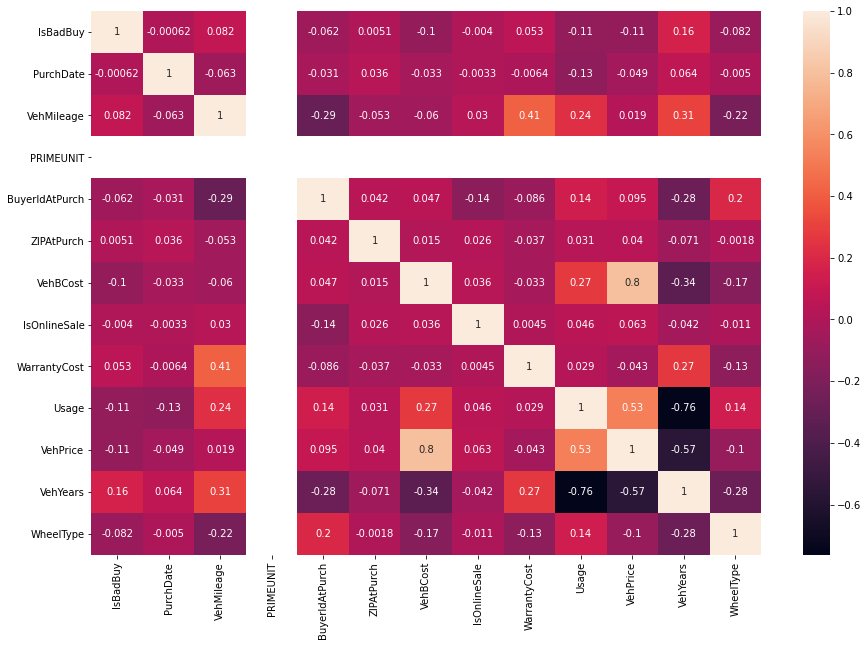

In [51]:
df = startOver()
df = clean_data(df)
df = engineer_features(df)

plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(), annot=True )

### Feature selection


In [53]:
df = startOver()
df = clean_data(df)
df = engineer_features(df)

continuous_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print('continuous_columns',continuous_columns)
print('categorical_columns',categorical_columns)

continuous_columns Index(['IsBadBuy', 'PurchDate', 'VehMileage', 'PRIMEUNIT', 'BuyerIdAtPurch',
       'ZIPAtPurch', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Usage',
       'VehPrice', 'VehYears', 'WheelType'],
      dtype='object')
categorical_columns Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'Nationality', 'Size', 'AmericanTop', 'GuartAtAuction', 'StateAtPurch'],
      dtype='object')


In [34]:
df.loc[:,continuous_columns]

IsBadBuy  PurchDate  VehMileage  PRIMEUNIT  BuyerIdAtPurch  ZIPAtPurch  \
0             0      -1.28       35547          0            5546       35004   
1             0       0.46       72131          0           20207       77086   
2             1      -2.06       77113          0            1235       84104   
3             0      -0.21       76202          0           20928       32824   
4             0       0.54       72653          0             835       85353   
...         ...        ...         ...        ...             ...         ...   
65615         0       1.66       68584          0           18111       30331   
65616         0       0.10       77945          0           18881       30272   
65617         0      -1.19       84341          0           22808       73108   
65618         0       0.63       78991          0           99740       50111   
65619         0      -1.12       96462          0           19662       77041   

       VehBCost  IsOnlineSale  WarrantyCost     Usage  VehPrice  VehYears  \
0        6400.0             0           462  11849.00     -0.35     -1.58   
1        3870.0             0           569  14426.20     -2.84      0.07   
2        5310.0             1           803  15422.60     -0.63     -0.34   
3        4600.0             0          4622  12700.33     -3.76      0.89   
4        6215.0             0          1623  24217.67     -7.78     -1.58   
...         ...           ...           ...       ...       ...       ...   
65615    5830.0             0           728  17146.00     -0.55     -0.75   
65616    5195.0             0          1389  12990.83     -0.36      0.48   
65617    5180.0             0          1243  21085.25     -0.19     -1.16   
65618    7295.0             0          1272  19747.75      0.92     -0.75   
65619    2835.0             0           909  19292.40     -1.82      0.07   

       WheelType  
0          -1.88  
1           2.13  
2          -1.88  
3           2.13  
4          -1.88  
...          ...  
65615      -1.88  
65616      -1.88  
65617      -1.88  
65618      -1.88  
65619       2.13  

[65620 rows x 13 columns]

In [11]:
def getTrainDataSets():
    df = startOver()
    features_train, features_test, target_train, target_test = splitDataSets(df)
 
    features_train = clean_data(features_train)
    features_train = engineer_features(features_train)

    features_test = clean_data(features_test)
    features_test = engineer_features(features_test)
     
    return features_train, features_test, target_train, target_test

features_train, features_test, target_train, target_test = getTrainDataSets()

In [12]:
def getFeatureRelevances():
    #continuous_columns = df.select_dtypes(include=['int', 'float']).columns
    #categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    continuous_columns = [
                      #'IsBadBuy', 
                      'PurchDate', 
                      'VehMileage', 
                      'PRIMEUNIT', 
                      #'BuyerIdAtPurch',
                      #'ZIPAtPurch', 
                      'VehBCost', 
                      #'IsOnlineSale',
                      'WarrantyCost', 
                      'Usage',
                      'VehPrice',
                      'VehYears',
                      'WheelType'
                     ]

    categorical_columns = [
                           'Auction',
                           'Make',
                           #'Model',
                           'Trim',
                           #'SubModel',
                           #'Color',
                           'Transmission',
                           'Nationality',
                           'Size',
                           'AmericanTop',
                           'GuartAtAuction',
                           #'StateAtPurch'
                          ]
    return continuous_columns, categorical_columns
continuous_columns, categorical_columns = getFeatureRelevances()

Selecting the right features is a good way to avoid *overfitting* and to improve your model overall. Less is more here.


In [175]:
# instantiate model
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree

#features_train, features_test, target_train, target_test = getTrainDataSets()
#continuous_columns, categorical_columns = getTrainColumns(features_train)

#samplers = [('oversampling', oversampler),
#        ('undersampling', undersampler),
#        ('SMOTE', smotesampler),
#        ('class_weights', 'passthrough')]

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Initialize the RandomForestClassifier
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42))
])

# Train the classifier on the training data
classifier.fit(features_train, target_train)

# Make predictions on the test data
predictions = classifier.predict(features_test)

print('Precision: ', precision_score(target_test, predictions))
print('Recall: ', recall_score(target_test, predictions)) 
print('f1_score: ', f1_score(target_test, predictions))

#print('best_estimator_', model_rf.best_estimator_)
#print('best_score_', model_rf.best_score_)

Precision:  0.20715917745620716
Recall:  0.6430260047281324
f1_score:  0.3133640552995392


In [104]:
display(preprocessor)
feature_importance = pd.Series(classifier.named_steps['classifier'].feature_importances_ )
feature_importance.sort_values(ascending=False)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['PurchDate', 'VehMileage', 'PRIMEUNIT',
                                  'VehBCost', 'WarrantyCost', 'Usage',
                                  'VehPrice', 'VehYears', 'WheelType']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Auction', 'Make', 'Trim', 'Transmission',
                                  'Nationality', 'Size', 'AmericanTop',
                                  'GuartAtAuction'])])

8      1.84e-01
7      1.35e-01
6      9.72e-02
3      9.68e-02
5      8.50e-02
         ...   
99     2.76e-07
148    3.87e-08
2      0.00e+00
46     0.00e+00
92     0.00e+00
Length: 203, dtype: float64

In [131]:
modelRF = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42)
modelRF.fit(features_train[continuous_columns], target_train)
predictionsMR = modelRF.predict(features_test[continuous_columns])

print('Precision: ', precision_score(target_test, predictionsMR))
print('Recall: ', recall_score(target_test, predictionsMR))
print('f1_score: ', f1_score(target_test, predictionsMR))

Precision:  0.2990586531498914
Recall:  0.48817966903073284
f1_score:  0.37090255949708123


In [132]:
feature_importance = pd.Series(modelRF.feature_importances_, index=continuous_columns)
feature_importance.sort_values(ascending=False)*100

WheelType       36.62
VehYears        12.08
VehBCost        11.63
VehPrice        10.84
Usage            8.99
VehMileage       8.62
PurchDate        5.97
WarrantyCost     5.25
PRIMEUNIT        0.00
dtype: float64

In [145]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

modelRF = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42)

# Create a pipeline with preprocessing and the Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', modelRF)
])

# Train the classifier on the training data
pipeline.fit(features_train, target_train);

In [146]:
# Get feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# print("features_train.shape[1]:",features_train.shape[1])
# print("importances:",importances)
# print("importances:",len(importances))
# print("indices:",indices)

print("Feature ranking:")
for f in range(features_train.shape[1]-1):
    print(f"({features_train.columns[indices[f]]}): {importances[indices[f]]*100 }")

Feature ranking:
(Trim): 15.621341939201344
(SubModel): 13.628262643285053
(Make): 12.242743912423327
(Model): 11.07470529183359
(Auction): 10.76682433014437
(PurchDate): 8.004440362570811


IndexError: index 491 is out of bounds for axis 0 with size 24

In [13]:
#Comparing results
#WheelType       36.62
#VehYears        12.08
#VehBCost        11.63
#VehPrice        10.84
#Usage            8.99
#VehMileage       8.62
#PurchDate        5.97
#WarrantyCost     5.25
#PRIMEUNIT        0.00

# 8 (VehMileage): 18.36403276017778
# 7 (Transmission): 13.496361098494663
# 6 (Color): 9.715889139987672
# 3 (Model): 9.683865057666443
# 5 (SubModel): 8.496264860628976
# 1 (Auction): 6.830255141667985
# 4 (Trim): 4.65116810289279
# 0 (PurchDate): 3.216679732214208

def getFeatureRelevances():
    #continuous_columns = df.select_dtypes(include=['int', 'float']).columns
    #categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    continuous_columns = [
                      #'IsBadBuy', 
                      #'PurchDate', 
                      'VehMileage', 
                      #'PRIMEUNIT', 
                      #'BuyerIdAtPurch',
                      #'ZIPAtPurch', 
                      #'IsOnlineSale',
                      #'WarrantyCost', 
                      'Usage',
                      'VehBCost',
                      'VehPrice',
                      'VehYears',
                      'WheelType'
                     ]

    categorical_columns = [
                           #'Auction',
                           'Make',
                           'Model',
                           #'Trim',
                           #'SubModel',
                           'Color',
                           'Transmission',
                           #'Nationality',
                           #'Size',
                           #'AmericanTop',
                           #'GuartAtAuction',
                           #'StateAtPurch'
                          ]
    return continuous_columns, categorical_columns
continuous_columns, categorical_columns = getFeatureRelevances()

In [137]:
#pipe_tree = Pipeline(steps=[('preprocess', ColumnTransformer(transformers=[('num', StandardScaler(),
#                                                                              continuous_columns),
#                                                                         #('cat', OneHotEncoder(),categorical_columns)
#                                                                          ])),
#                           ('classifier', RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42))])


#pipe_tree.fit(features_train[continuous_columns], target_train)
#tree_pred = pipe_tree.predict(features_test[continuous_columns])

#model_rf = RandomForestClassifier(n_estimators=100, max_depth=4, class_weight='balanced', random_state=42)

#ct = ColumnTransformer(transformers=[('num', StandardScaler(), continuous_columns),
#                                      #('cat', OneHotEncoder(), categorical_columns)
#                                    ],
#                       remainder='passthrough')

#features_train = features_train[continuous_columns]
#features_test = features_test[continuous_columns]
#features_train = ct.fit_transform(features_train)
#model_rf.fit(features_train,target_train)
#predictRandomForest = model_rf.predict(features_test)

### Model training


Now it's time to create and evaluate a model.
When creating the model, it can be helpful to ask yourself the following questions:


- Which model should you use? You got to know the following Classification models in this course:
    * `sklearn.neighbors.KNeighborsClassifier` (see *Modul 1, Chapter 2, k Nearest Neighbors*)
    * `sklearn.linear_model.LogisticRegression` (see *Module 2, Chapter 2, Logistic Regression*)
    * `sklearn.tree.DecisionTreeClassifier` (see *Module 2, Chapter 3, Decision Tree*)
    * `sklearn.ensemble.RandomForestClassifier` (see *Module 2, Chapter 3, From Decision Trees to Random Forests with Ensembling*)
    * `sklearn.svm.SVC` (see *Module 2, Chapter 4, Support Vector Machines*)
    * Artificial neural networks with `keras` (see *Module 2, Chapter 5, Introduction to Artificial Neural Networks - Neural Networks*)
- How good are the predictions on unseen data? The following objects can help you with this:
    * `sklearn.pipeline.pipeline` (see *Module 1, Chapter 1, Introduction to Pipelines*)
    * `sklearn.model_selection.KFold` (see *Module 1, Chapter 1, Validating Models with Cross Validation*)
    * `sklearn.model_selection.cross_val_score()` (see *Module 1, Chapter 1, Introduction to Pipelines*)
    * `sklearn.model_selection.validation_curve()` (see *Module 1, Chapter 1, Grid Search*)
    * `sklearn.model_selection.GridSearchCV` (see *Module 1, Chapter 1, Grid Search*)
Which features are important for your model and which ones can you do without?


We recommend that you run the following code cell so that you do not see the data conversion warning.


In [17]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

To save you some typing, we've already defined an import command. Feel free to add to it:


In [16]:
#useful imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [17]:
def evaluateModel(target_test,predictions):
    print(classification_report(target_test,predictions))

First build a simple model and evaluate it to have a comparison value.


In [21]:
# instantiate model
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree

def baseModel(n_estimators=200, max_depth=10):
    # Preprocessing for categorical features
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

    modelRF = RandomForestClassifier(class_weight='balanced', 
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     random_state=42)

    # Create a pipeline with preprocessing and the Random Forest classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', modelRF)
                              ])

    # Train the classifier on the training data
    pipeline.fit(features_train, target_train)

    # Make predictions on the test data
    predictions = pipeline.predict(features_test)
    evaluateModel(target_test,predictions)


Then optimize the hyper parameters. Does this improve your predictions?


In [74]:
# tune hyperparameters
features_train, features_test, target_train, target_test = getTrainDataSets()
continuous_columns, categorical_columns = getFeatureRelevances()

baseModel(n_estimators=200, max_depth=10)
#baseModel(n_estimators=500, max_depth=15)

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      5716
           1       0.21      0.64      0.31       846

    accuracy                           0.64      6562
   macro avg       0.57      0.64      0.53      6562
weighted avg       0.83      0.64      0.70      6562



### Model selection


Select the best model. Decide for yourself which metric is most important to you. With `confusion_matrix()` from `sklearn.metrics` you can see exactly how many data points were classified correctly and incorrectly. Maybe this will help you decide.


In [18]:
def deployConfusionMatrix(con_matrix):
    ConfusionMatrixDisplay(confusion_matrix=con_matrix).plot()

In [141]:
features_train, features_test, target_train, target_test = getTrainDataSets()
continuous_columns, categorical_columns = getFeatureRelevances()

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      5716
           1       0.20      0.65      0.31       846

    accuracy                           0.62      6562
   macro avg       0.56      0.63      0.52      6562
weighted avg       0.83      0.62      0.69      6562



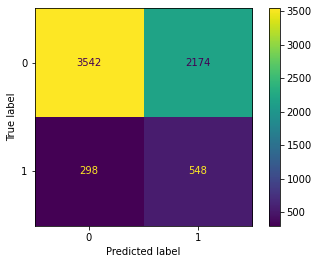

In [142]:
# select model
#Checking confusion matrix with RandomForest

search_space = {'classifier__max_depth': range(2, 10, 2), 
                'classifier__class_weight': [None, 'balanced'], 
                'classifier__n_estimators': range(2, 100, 2)
               }

preprocessor = ColumnTransformer(transformers=[
                                    ('num', StandardScaler(), continuous_columns),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
                                ])

# Create a pipeline with preprocessing and the Random Forest classifier
pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))
                              ])

grid_RF = GridSearchCV(estimator=pipeline_RF,
                          param_grid=search_space,
                          scoring='f1',
                          cv=5,
                          n_jobs=-1)

# Train the classifier on the training data
grid_RF.fit(features_train, target_train)

#Get best model
bestRFModel = grid_RF.best_estimator_

#Create predictions
predictions = bestRFModel.predict(features_test)

#Evaluate
evaluateModel(target_test,predictions)
cm = confusion_matrix(target_test, predictions)
deployConfusionMatrix(cm)

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_e

              precision    recall  f1-score   support

           0       0.92      0.64      0.76      5716
           1       0.20      0.62      0.31       846

    accuracy                           0.64      6562
   macro avg       0.56      0.63      0.53      6562
weighted avg       0.83      0.64      0.70      6562



/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


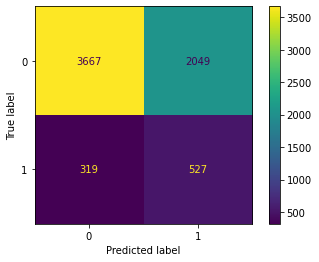

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_e

In [144]:
#Checking confusion matrix with Logistic Reggresion
preprocessor = ColumnTransformer(transformers=[
                                    ('num', StandardScaler(), continuous_columns),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
                                 ])

pipeline_log = Pipeline([('preprocessor', preprocessor),
                         #('scaler', StandardScaler()),
                         ('classifier', LogisticRegression(solver='saga', random_state=42))])

search_space_grid = [{'classifier__penalty': ['l1', 'l2'],
                      'classifier__max_iter': range(2, 20, 2),
                      'classifier__class_weight': [None,'balanced']
                     }]

gridLG = GridSearchCV(estimator=pipeline_log,
                          param_grid=search_space_grid,
                          scoring='f1',
                          cv=5,
                          n_jobs=-1)

gridLG.fit(features_train, target_train) 

#Get best model
bestLGModel = gridLG.best_estimator_

#Create predictions
predictions = bestLGModel.predict(features_test)

#Evaluate
evaluateModel(target_test,predictions)
cm = confusion_matrix(target_test, predictions)
deployConfusionMatrix(cm)

Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'VehMileage', 'Nationality', 'Size', 'AmericanTop',
       'PRIMEUNIT', 'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch',
       'StateAtPurch', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Usage',
       'VehPrice', 'VehYears', 'WheelType'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.92      0.64      0.76      5716
           1       0.20      0.62      0.31       846

    accuracy                           0.64      6562
   macro avg       0.56      0.63      0.53      6562
weighted avg       0.83      0.64      0.70      6562



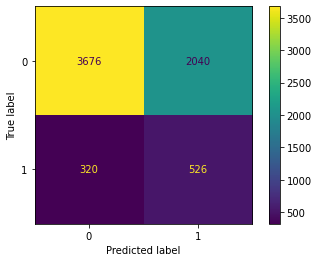

In [ ]:
from sklearn.svm import LinearSVC

#Checking confusion matrix with LinearSVC
preprocessor = ColumnTransformer(transformers=[
                                    ('num', StandardScaler(), continuous_columns),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
                                 ])
pipeline_LSVC = Pipeline([('preprocessor', preprocessor),
                         ('classifier', LinearSVC(dual=False, random_state=1)
                         )])

search_space = {'classifier__C': [0.01, 0.1, 1, 10, 100],
                'classifier__class_weight': ['balanced']}

gridLVC = GridSearchCV(estimator=pipeline_LSVC,
                      param_grid=search_space,
                      scoring='f1',
                      cv=5,
                      n_jobs=-1)
gridLVC.fit(features_train, target_train)

#Get best model
bestLVCModel = gridLVC.best_estimator_
display(features_train.columns)
#Create predictions
predictions = bestLVCModel.predict(features_test)

#Evaluate
evaluateModel(target_test,predictions)
cm = confusion_matrix(target_test, predictions)
deployConfusionMatrix(cm)

In [71]:
# Get coefficients of the model
coefficients = bestLVCModel.named_steps['classifier'].coef_

# Combine feature names for numerical and categorical features
all_feature_names = features_test.columns

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = dict(zip(all_feature_names, coefficients[0]))

# Sort feature coefficients by absolute value to see the most relevant features
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print or use the sorted_features dictionary as needed
print("Feature Relevance (Absolute Coefficients):")
for feature, coefficient in sorted_features:
    print(f"{feature}: {coefficient}")

Feature Relevance (Absolute Coefficients):
WarrantyCost: 0.4122160417617686
ZIPAtPurch: 0.2341865665127593
WheelType: 0.19525858301712204
GuartAtAuction: -0.18793028532738976
PRIMEUNIT: -0.17850108335069312
StateAtPurch: -0.1477716020450246
Usage: 0.14023813696210047
Make: -0.13439612250334634
Transmission: -0.12209064163795068
Trim: 0.11518250043464315
VehMileage: -0.11498759640584363
SubModel: -0.09878223693050835
Size: -0.09587541514570434
PurchDate: 0.09031972797200777
Auction: -0.08289262590163128
VehBCost: 0.06925430495235081
Color: 0.06677983265166174
VehYears: -0.06093597758518049
Model: 0.060001426188277626
AmericanTop: -0.034329204316285944
BuyerIdAtPurch: -0.031358759906205166
Nationality: -0.02099896528115107
IsOnlineSale: 0.014634075724435182
VehPrice: -0.003704376974129196


**Congratulations**:
You have built and saved your final model. Now you can combine all the steps in one function to determine the prediction quality on the test data set.


## The final data pipeline

You've cleaned and prepared the data and then trained a model on it. Now combine the respective steps in a function or pipeline that reads a data set and generates predictions for it. Don't delete data points from the test data. This could distort the model's estimated prediction quality.


In [65]:
#Ideaa from previous solutions !!!!!!!!!!!!!!!!!!!!!!!!! 
def importantFeatures():
    return ['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'VehMileage', 'Nationality', 'Size', 'AmericanTop',
       'PRIMEUNIT', 'GuartAtAuction', 'BuyerIdAtPurch', 'ZIPAtPurch',
       'StateAtPurch', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Usage',
       'VehPrice', 'VehYears', 'WheelType']

def Ending(csv_file):
    #read
    features = pd.read_csv(csv_file)
    features.columns = readableCols[1:]

    #clean
    features = clean_data(features)

    #features
    features = engineer_features(features)
    
    #predict
    predictions = bestLVCModel.predict(features.loc[:,importantFeatures()])
    return predictions


**Congratulations**:
You now have a function that imports the data for you, prepares it and makes predictions directly. This will be very helpful for the buyers.


## Model Interpretation


In order to make your model more appealing to the company's buyers, you should be able to explain to them which features are important for the model.

According to your model, which features are most important for the predictions?


In [34]:
# Get coefficients of the model
coefficients = bestLVCModel.named_steps['classifier'].coef_

# Combine feature names for numerical and categorical features
all_feature_names = continuous_columns + categorical_columns

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = dict(zip(all_feature_names, coefficients[0]))

# Sort feature coefficients by absolute value to see the most relevant features
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print or use the sorted_features dictionary as needed
print("Feature Relevance (Absolute Coefficients):")
for feature, coefficient in sorted_features:
    print(f"{feature}: {coefficient}")

Feature Relevance (Absolute Coefficients):
VehBCost: -0.13439612250334634
Model: -0.12209064163795068
VehYears: 0.11518250043464315
Color: -0.11498759640584363
WheelType: -0.09878223693050835
VehMileage: 0.09031972797200777
Usage: -0.08289262590163128
Make: 0.06677983265166174
VehPrice: 0.060001426188277626
Transmission: -0.02099896528115107


How does your average prediction change when you vary the mileage `'VehOdo'` or the age `'VehicleAge'`. Is that what you'd expect?


In [76]:
dfFinal = startOver()
features_train_final, features_test_final, target_train_final, target_test_final = splitDataSets(dfFinal)

features_toRanzomized = features_test_final.copy()
columnsToTest = ['VehMileage', 'VehicleAge']

def randomValues(innerDF):
    for col in columnsToTest:
        innerDF[col] = np.random.permutation(innerDF[col].values)
    return innerDF

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize a list to store average predictions
avg_predictions = []

for X in range(0,50):

    features_NoRanzomized = clean_data(features_test_final.copy())
    features_NoRanzomized = engineer_features(features_NoRanzomized) 
    predictionsNoRandom = bestLVCModel.predict(features_NoRanzomized)

    features_toRanzomized = randomValues(features_test_final.copy())
    features_toRanzomized = clean_data(features_toRanzomized)
    features_toRanzomized = engineer_features(features_toRanzomized) 
    predictionsRandom     = bestLVCModel.predict(features_toRanzomized)

    results = { 'precision': precision_score(target_test_final,predictionsNoRandom), 
                'recall':    recall_score(target_test_final,predictionsNoRandom), 
                'f1':        f1_score(target_test_final,predictionsNoRandom), 
                'Mean':      np.mean(predictionsNoRandom),

                'random precision': precision_score(target_test_final,predictionsRandom), 
                'random recall':    recall_score(target_test_final,predictionsRandom), 
                'random f1':        f1_score(target_test_final,predictionsRandom), 
                'random Mean':      np.mean(predictionsRandom)
              }

    # Store the average prediction
    avg_predictions.append(results)

avg_predictions_pd = pd.DataFrame(avg_predictions) * 100
avg_predictions_pd.head()

precision     recall         f1       Mean  random precision  \
0  20.498831  62.174941  30.832356  39.103932         18.520050   
1  20.498831  62.174941  30.832356  39.103932         15.381374   
2  20.498831  62.174941  30.832356  39.103932         15.533165   
3  20.498831  62.174941  30.832356  39.103932         19.057294   
4  20.498831  62.174941  30.832356  39.103932         18.796069   

   random recall  random f1  random Mean  
0      52.955083  27.442573    36.863761  
1      43.144208  22.677850    36.162755  
2      43.735225  22.924411    36.299909  
3      55.437352  28.364076    37.503810  
4      54.255319  27.919708    37.214264

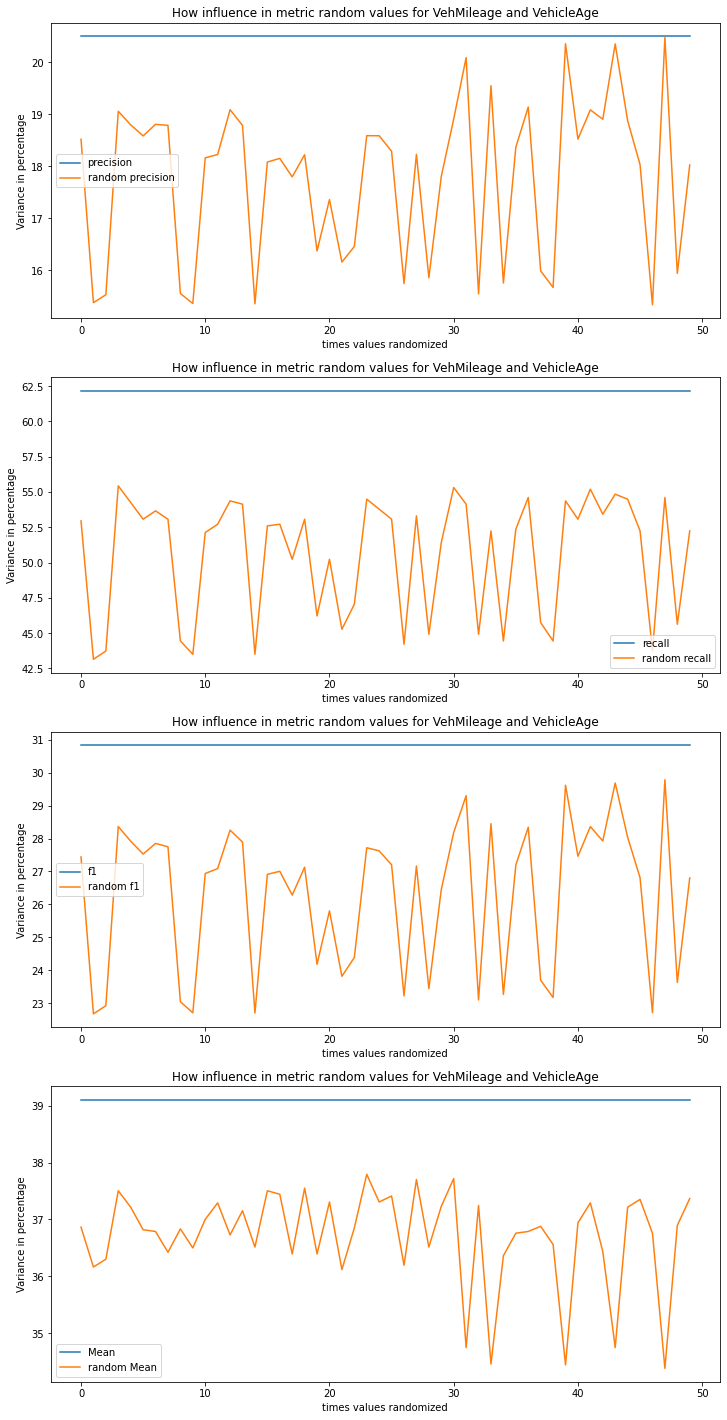

In [98]:
fig, axs = plt.subplots(figsize=[12, 25], nrows=4)
title = 'How influence in metric random values for {} and {}'.format(columnsToTest[0],columnsToTest[1])
ylabel = 'Variance in percentage'
xlabel = 'times values randomized'

avg_predictions_pd.loc[:,['precision','random precision']].plot(ax=axs[0])
axs[0].set(xlabel=xlabel, ylabel=ylabel, title=title);

avg_predictions_pd.loc[:,['recall','random recall']].plot(ax=axs[1])
axs[1].set(xlabel=xlabel, ylabel=ylabel, title=title);

avg_predictions_pd.loc[:,['f1','random f1']].plot(ax=axs[2])
axs[2].set(xlabel=xlabel, ylabel=ylabel, title=title);

avg_predictions_pd.loc[:,['Mean','random Mean']].plot(ax=axs[3])
axs[3].set(xlabel=xlabel, ylabel=ylabel, title=title);

In [137]:
avg_predictions_perColumn = []
features_toRanzomized = features_test_final.copy()

continuous_columns  = features_toRanzomized.select_dtypes(include=['int', 'float']).columns
categorical_columns = features_toRanzomized.select_dtypes(include=['object', 'category']).columns

for col in continuous_columns:
    features_toRanzomized = clean_data(features_toRanzomized)
    features_toRanzomized[col] = np.random.permutation(features_toRanzomized[col].values)
    features_toRanzomized = engineer_features(features_toRanzomized)

    # Make predictions with the model
    predictions = bestLVCModel.predict(features_toRanzomized)

    # Calculate the average prediction
    avg_prediction = np.mean(predictions)
    avg_predictions_perColumn.append({
                            'precision': precision_score(target_test_final,predictions),
                            'recall':    recall_score(target_test_final,predictions),
                            'f1':        f1_score(target_test_final,predictions),
                            'Mean':      avg_prediction
                          })

for col in categorical_columns:
    print(col)
    features_toRanzomized[col] = np.random.shuffle(features_toRanzomized[col])
    features_toRanzomized = clean_data(features_toRanzomized)
    features_toRanzomized = engineer_features(features_toRanzomized)

    # Make predictions with the model
    predictions = bestLVCModel.predict(features_toRanzomized)

    # Calculate the average prediction
    avg_prediction = np.mean(predictions)
    avg_predictions_perColumn.append({  'precision': precision_score(target_test_final,predictions),
                                        'recall':    recall_score(target_test_final,predictions),
                                        'f1':        f1_score(target_test_final,predictions),
                                        'Mean':      avg_prediction })

avg_predictions_perColumn_pd = pd.DataFrame(avg_predictions_perColumn, index=importantFeatures()) * 100

fig, axs = plt.subplots(figsize=[12, 25])
title = 'How influence in metric random values per Column'
ylabel = 'Variance in percentage'
xlabel = 'times values randomized'

avg_predictions_perColumn_pd.loc[:,['precision','random precision']].plot()
axs.set(xlabel=xlabel, ylabel=ylabel, title=title);


KeyError: "None of [Index(['AcquisitionAuctionAvgPrice', 'AcquisitionAuctionCleanPrice',\n       'AcquisitionRetailAvgPrice', 'AcquisitonRetailCleanPrice',\n       'CurrentAuctionAvgPrice', 'CurrentAuctionCleanPrice',\n       'CurrentRetailAvgPrice', 'CurrentRetailCleanPrice'],\n      dtype='object')] are in the [columns]"

## Completing the project


The file *features_aim.csv* contains the features for your final prediction.
Save just your predicted values for `'IsBadBuy'` in a CSV file called 
`predictions_aim.csv`. According to your model, how many purchases in the target data should be avoided?


In [33]:
prediction_final = Ending('features_aim.csv')
pd.DataFrame(prediction_final).to_csv('predictions_aim.csv', sep='\t', encoding='utf-8')

**Congratulations**:
You've completed another independent data science project! This means you're well equipped to implement projects independently and as part of a team!


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
